## Please follow the below structure while attempting the hackathon, make sure to submit only one jupyter file with all the models, and you can always mention your best model by giving it the header as 'Best Model'.

## Please make sure to maintain the clarity of analysis in the notebook with proper headers and inisghts/inferences, so that it can be interpretable 


## Please follow the same format as mentioned below, as you will be evaluated basis on your Jupyter Notebook for L2 selection.

## Importing Necessary Libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import os

In [71]:
# Load Train data

df_train=pd.read_csv('Data_Train.csv')

In [72]:
pd.options.display.max_columns= None

In [73]:
df_train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [74]:
df_train.tail()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
87495,120884,4535984,II,>10yrs,Not Vfied,75680.00,REN?,0,0,Engineer Support II,19.3200,48000.0,10260.0,0,8.35,51.084,1,15100.14,0.0,17,whole,MI,12,32702.0,3 years,10012.05,debt consolidation,I,0.0,0
87496,33259,2624710,IV,3yrs,Source Verified,90423.52,REN?,0,0,Dental Hygienist,48.8208,1400.0,27360.0,0,24.18,129.172,0,102811.88,0.0,28,whole,MA,23,32204.0,5 years,24921.54,debt consolidation,I,0.0,0
87497,102153,5966919,II,>10yrs,Source Verified,91520.00,MOR??AGE,0,0,Interface Coordinator,7.7952,6400.0,8550.0,3,11.03,83.420,1,14584.11,0.0,16,fully paid,CT,8,29050.0,3 years,14517.90,debt consolidation,I,0.0,0
87498,115343,2630667,III,1yrs,Source Verified,61600.00,MOR??AGE,0,0,PARTS CLERK,8.2992,16800.0,23769.0,1,22.52,56.760,1,59281.66,0.0,25,whole,PA,11,24900.0,3 years,8454.24,debt consolidation,I,0.0,0
87499,104968,6637289,III,2yrs,Vfied,NaN,REN?,0,0,Outside sales rep,15.1872,92800.0,28471.5,1,15.53,67.080,0,10445.85,0.0,25,whole,California,7,21746.0,5 years,8717.58,debt consolidation,I,0.0,0


In [75]:
# Load Test data

df_test=pd.read_csv('Data_Test.csv')

In [76]:
df_test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,16.9176,90600.0,17955.00,0,8.88,78.432,1,59769.30,0.0,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,28.6944,32300.0,59850.00,0,10.10,76.368,1,532962.13,0.0,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,51.1560,88000.0,59850.00,0,19.30,157.552,2,288816.48,0.0,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,27.0144,19900.0,19323.00,0,8.82,32.852,2,424664.30,0.0,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,10.3824,34900.0,25350.75,1,13.52,108.532,1,251704.07,0.0,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [77]:
df_test.tail()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
37495,191405,5774816,IV,4yrs,Vfied,308000.0,MOR??AGE,1,0,Regional Manager,29.4336,91700.0,59850.00,0,19.15,52.116,4,848107.83,0.0,29,fully paid,California,19,132468.0,3 years,57683.43,debt consolidation,I,0.0
37496,164868,1423834,IV,8yrs,Source Verified,158400.0,MOR??AGE,0,0,Clinical Coordinator,31.6008,19500.0,28215.00,0,19.02,165.120,1,614710.30,0.0,28,fully paid,PA,14,51958.0,5 years,51395.76,credit card,I,0.0
37497,163156,1895531,V,>10yrs,Not Vfied,52800.0,OWN,0,0,administrative,46.9728,90800.0,4916.25,1,18.68,54.868,3,47287.72,0.0,33,fully paid,California,9,8466.0,3 years,2783.88,debt consolidation,I,0.0
37498,169610,2168910,VI,9yrs,Not Vfied,52800.0,OWN,5,0,ParaEducator,48.0480,37000.0,15390.00,1,10.47,137.772,1,107614.80,0.0,40,whole,TN,9,17264.0,3 years,NaN,home improvement,I,0.0
37499,175557,4140268,II,>10yrs,Source Verified,121440.0,MOR??AGE,0,0,School Teacher,27.2664,91900.0,24624.00,0,9.80,104.060,0,783477.16,0.0,19,fully paid,California,15,47310.0,3 years,29504.34,debt consolidation,I,0.0


In [78]:
# Checking size of train and test data.

print('Size of train : ', df_train.shape)
print('Size of test : ', df_test.shape)

Size of train :  (87500, 30)
Size of test :  (37500, 29)


In [79]:
# Info of train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [80]:
# Renaming the columns, Rename Target columns to default

df_train.rename(columns={'Yearly Income':'Yearly_Income','Home Status':'Home_Status',
                         'Unpaid 2 years':'Unpaid_2_years','Debt to Income':'Debt_to_Income_Ratio',
                         'File Status':'File_Status','Claim Type':'Claim_Type',
                         'Loan/No Loan':'Default','Already Defaulted':'Already_Defaulted',
                         'Postal Code':'Postal_Code','Lend Amount':'Lend_Amount',
                         'Deprecatory Records':'Deprecatory_Records',
                         'Interest Charged':'Interest_Charged','Usage Rate':'Usage_Rate',
                         'Present Balance':'Present_Balance','Gross Collection':'Gross_Collection',
                         'Sub GGGrade':'Sub_GGGrade','Account Open':'Account_Open',
                         'Total Unpaid CL':'Total_Unpaid_CL','Unpaid Amount':'Unpaid_Amount',
                         'Due Fee':'Due_Fee'},inplace= True)

In [81]:
# Data Distribution for target Variable
df_train['Default'].value_counts(normalize=True)

0    0.811291
1    0.188709
Name: Default, dtype: float64

* There are 30 variable and 87500 records in train data
* As Loan/ No loan tagret variable there are almost 81:19 class ratio
* We have Rename variable as if default==1 then  No loan 

In [82]:
# Info of test data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly Income        35075 non-null  float64
 6   Home Status          37500 non-null  object 
 7   Unpaid 2 years       37500 non-null  int64  
 8   Already Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt to Income       35989 non-null  float64
 11  Postal Code          36889 non-null  float64
 12  Lend Amount          37500 non-null  float64
 13  Deprecatory Records  37500 non-null  int64  
 14  Interest Charged     37500 non-null  float64
 15  Usage Rate           37500 non-null 

In [83]:
# Renaming the columns, Rename Target columns to default
df_test.rename(columns={'Yearly Income':'Yearly_Income','Home Status':'Home_Status',
                        'Unpaid 2 years':'Unpaid_2_years','Debt to Income':'Debt_to_Income_Ratio',
                        'File Status':'File_Status','Claim Type':'Claim_Type',
                        'Already Defaulted':'Already_Defaulted','Postal Code':'Postal_Code',
                        'Lend Amount':'Lend_Amount','Deprecatory Records':'Deprecatory_Records',
                        'Interest Charged':'Interest_Charged','Usage Rate':'Usage_Rate',
                        'Present Balance':'Present_Balance','Gross Collection':'Gross_Collection',
                        'Sub GGGrade':'Sub_GGGrade','Account Open':'Account_Open',
                        'Total Unpaid CL':'Total_Unpaid_CL','Unpaid Amount':'Unpaid_Amount',
                        'Due Fee':'Due_Fee'},inplace= True)

* There are 29 variable and 37500 records in test data

In [84]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,87500.0,8.394625e+04,3.610010e+04,21560.0,5.261675e+04,8.390000e+04,1.152612e+05,1.465590e+05
Asst_Reg,87500.0,3.798914e+06,2.289038e+06,24847.0,1.483874e+06,4.132010e+06,5.952909e+06,7.351847e+06
Yearly_Income,81925.0,1.348596e+05,9.882473e+04,8800.0,8.324659e+04,1.144000e+05,1.601600e+05,8.264031e+06
Unpaid_2_years,87500.0,3.329371e-01,8.760799e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01
Already_Defaulted,87500.0,5.725714e-03,8.350455e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
Debt_to_Income_Ratio,84011.0,3.094266e+01,1.407981e+01,0.0,2.042880e+01,3.013920e+01,4.090800e+01,6.392904e+02
Postal_Code,86111.0,5.115539e+04,3.121123e+04,1000.0,2.290000e+04,4.770000e+04,8.020000e+04,9.990000e+04
Lend_Amount,87500.0,2.592054e+04,1.443384e+04,1710.0,1.504800e+04,2.394000e+04,3.420000e+04,5.985000e+04
Deprecatory_Records,87500.0,2.024000e-01,6.464135e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.600000e+01
Interest_Charged,87500.0,1.651837e+01,4.902011e+00,8.0,1.231000e+01,1.649000e+01,2.077000e+01,2.500000e+01


In [85]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,37500.0,1.841439e+05,2.168322e+04,146560.0,1.653412e+05,1.842570e+05,2.028692e+05,221557.000
Asst_Reg,37500.0,3.804858e+06,2.284115e+06,37522.0,1.495828e+06,4.134010e+06,5.934898e+06,7351969.000
Yearly_Income,35075.0,1.340308e+05,1.000845e+05,8800.0,8.419400e+04,1.144000e+05,1.584000e+05,8800000.000
Unpaid_2_years,37500.0,3.364267e-01,8.876400e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,18.000
Already_Defaulted,37500.0,5.306667e-03,7.796581e-02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.000
Debt_to_Income_Ratio,35989.0,3.091903e+01,1.387167e+01,0.0,2.047920e+01,3.018960e+01,4.072320e+01,116.508
Postal_Code,36889.0,5.123395e+04,3.125043e+04,1000.0,2.290000e+04,4.780000e+04,8.020000e+04,99900.000
Lend_Amount,37500.0,2.582800e+04,1.440206e+04,1710.0,1.491975e+04,2.381175e+04,3.420000e+04,59850.000
Deprecatory_Records,37500.0,2.000800e-01,5.631369e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,21.000
Interest_Charged,37500.0,1.651101e+01,4.912595e+00,8.0,1.225000e+01,1.651500e+01,2.077000e+01,25.000


In [86]:
#  Checking missing value in train
df_train.isnull().sum().sort_values(ascending=False)

Yearly_Income           5575
Unpaid_Amount           4852
Total_Unpaid_CL         4186
Debt_to_Income_Ratio    3489
Designation             1414
Postal_Code             1389
Sub_GGGrade                0
File_Status                0
State                      0
Account_Open               0
ID                         0
Present_Balance            0
Duration                   0
Reason                     0
Claim_Type                 0
Due_Fee                    0
Gross_Collection           0
Usage_Rate                 0
Inquiries                  0
Asst_Reg                   0
Interest_Charged           0
Deprecatory_Records        0
Lend_Amount                0
Already_Defaulted          0
Unpaid_2_years             0
Home_Status                0
Validation                 0
Experience                 0
GGGrade                    0
Default                    0
dtype: int64

In [87]:
#  Checking missing value in test
df_test.isnull().sum().sort_values(ascending=False)

Yearly_Income           2425
Unpaid_Amount           2069
Total_Unpaid_CL         1814
Debt_to_Income_Ratio    1511
Postal_Code              611
Designation              586
ID                         0
Present_Balance            0
Claim_Type                 0
Reason                     0
Duration                   0
Account_Open               0
State                      0
File_Status                0
Sub_GGGrade                0
Gross_Collection           0
Interest_Charged           0
Inquiries                  0
Usage_Rate                 0
Asst_Reg                   0
Deprecatory_Records        0
Lend_Amount                0
Already_Defaulted          0
Unpaid_2_years             0
Home_Status                0
Validation                 0
Experience                 0
GGGrade                    0
Due_Fee                    0
dtype: int64

* Missing values in six feature Yearly Income,Designation ,Debt to Income,Postal Code,Total Unpaid CL  and Unpaid Amount

In [88]:
#  Checking duplicated value in train set
df_train.duplicated().sum()

0

In [89]:
#  Checking duplicated value in train set
df_test.duplicated().sum()

0

In [90]:
#  Combine train and test data into single dataframe
df=pd.concat([df_train,df_test],axis=0)

In [91]:
# Total % missing values by features Train

percent_missing = df_train.isnull().sum() * 100 / df_train.shape[0]
percent_missing.sort_values(ascending=False)

Yearly_Income           6.371429
Unpaid_Amount           5.545143
Total_Unpaid_CL         4.784000
Debt_to_Income_Ratio    3.987429
Designation             1.616000
Postal_Code             1.587429
Sub_GGGrade             0.000000
File_Status             0.000000
State                   0.000000
Account_Open            0.000000
ID                      0.000000
Present_Balance         0.000000
Duration                0.000000
Reason                  0.000000
Claim_Type              0.000000
Due_Fee                 0.000000
Gross_Collection        0.000000
Usage_Rate              0.000000
Inquiries               0.000000
Asst_Reg                0.000000
Interest_Charged        0.000000
Deprecatory_Records     0.000000
Lend_Amount             0.000000
Already_Defaulted       0.000000
Unpaid_2_years          0.000000
Home_Status             0.000000
Validation              0.000000
Experience              0.000000
GGGrade                 0.000000
Default                 0.000000
dtype: flo

In [92]:
# Total % missing values by features Test

percent_missing = df_test.isnull().sum() * 100 / df_test.shape[0]
percent_missing.sort_values(ascending=False)

Yearly_Income           6.466667
Unpaid_Amount           5.517333
Total_Unpaid_CL         4.837333
Debt_to_Income_Ratio    4.029333
Postal_Code             1.629333
Designation             1.562667
ID                      0.000000
Present_Balance         0.000000
Claim_Type              0.000000
Reason                  0.000000
Duration                0.000000
Account_Open            0.000000
State                   0.000000
File_Status             0.000000
Sub_GGGrade             0.000000
Gross_Collection        0.000000
Interest_Charged        0.000000
Inquiries               0.000000
Usage_Rate              0.000000
Asst_Reg                0.000000
Deprecatory_Records     0.000000
Lend_Amount             0.000000
Already_Defaulted       0.000000
Unpaid_2_years          0.000000
Home_Status             0.000000
Validation              0.000000
Experience              0.000000
GGGrade                 0.000000
Due_Fee                 0.000000
dtype: float64

In [93]:
#Convering the descreate variable into catagorical
df['Deprecatory_Records']= df['Deprecatory_Records'].astype('object')
df['Inquiries']= df['Inquiries'].astype('object')
df['Already_Defaulted']= df['Already_Defaulted'].astype('object')
df['Unpaid_2_years']= df['Unpaid_2_years'].astype('object')
df['Default']= df['Default'].astype('object')
df['Account_Open']= df['Account_Open'].astype('object')
df['Sub_GGGrade']= df['Sub_GGGrade'].astype('object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    125000 non-null  int64  
 1   Asst_Reg              125000 non-null  int64  
 2   GGGrade               125000 non-null  object 
 3   Experience            125000 non-null  object 
 4   Validation            125000 non-null  object 
 5   Yearly_Income         117000 non-null  float64
 6   Home_Status           125000 non-null  object 
 7   Unpaid_2_years        125000 non-null  object 
 8   Already_Defaulted     125000 non-null  object 
 9   Designation           123000 non-null  object 
 10  Debt_to_Income_Ratio  120000 non-null  float64
 11  Postal_Code           123000 non-null  float64
 12  Lend_Amount           125000 non-null  float64
 13  Deprecatory_Records   125000 non-null  object 
 14  Interest_Charged      125000 non-null  float64
 15  U

In [95]:
# Postal code is the Continuous variable given but is is Identification number of state  
# we can drop it from train and test

df=df.drop(['Postal_Code'],axis=1)

#### for cleaning split data into catagorical and numerical datafeame

In [96]:
#   For Numeric variable
df_num=df.select_dtypes(include = ['float64', 'int64'])

In [97]:
#   For catagorical  variable
df_cat=df.select_dtypes(include = ['object'])


In [98]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,125000.0,1.140055e+05,5.622828e+04,21560.0,6.601975e+04,110733.000,1.591472e+05,2.215570e+05
Asst_Reg,125000.0,3.800697e+06,2.287555e+06,24847.0,1.487898e+06,4132377.000,5.945917e+06,7.351969e+06
Yearly_Income,117000.0,1.346112e+05,9.920437e+04,8800.0,8.360000e+04,114400.000,1.588633e+05,8.800000e+06
Debt_to_Income_Ratio,120000.0,3.093557e+01,1.401766e+01,0.0,2.044560e+01,30.156,4.084080e+01,6.392904e+02
Lend_Amount,125000.0,2.589278e+04,1.442432e+04,1710.0,1.500525e+04,23940.000,3.420000e+04,5.985000e+04
Interest_Charged,125000.0,1.651617e+01,4.905170e+00,8.0,1.229000e+01,16.500,2.077000e+01,2.500000e+01
Usage_Rate,125000.0,9.543988e+01,4.053581e+01,0.0,6.587600e+01,96.836,1.265920e+02,1.534756e+03
Present_Balance,125000.0,2.360785e+05,2.548323e+05,0.0,5.158463e+04,138696.840,3.528714e+05,5.629234e+06
Gross_Collection,125000.0,3.946841e+01,3.837882e+02,0.0,0.000000e+00,0.000,0.000000e+00,2.630847e+04
Total_Unpaid_CL,119000.0,5.332249e+04,5.292769e+04,332.0,2.324000e+04,39674.000,6.640000e+04,1.710630e+06


In [99]:
df_cat.describe(include='all').T

,count,unique,top,freq
GGGrade,125000,7,II,35505
Experience,125000,11,>10yrs,44008
Validation,125000,3,Source Verified,49150
Home_Status,125000,5,MOR??AGE,63072
Unpaid_2_years,125000,19,0,99683
Already_Defaulted,125000,7,0,124348
Designation,123000,54539,School Teacher,2251
Deprecatory_Records,125000,19,0,105391
Inquiries,125000,8,0,71102
Sub_GGGrade,125000,35,19,7731


In [100]:
# text=df.Designation.value_counts().index.to_list()

In [101]:
# text=[x.lower() for x in text]

In [102]:
# text

In [103]:
# set_1=set(text)

In [104]:
# len(set_1)

In [105]:
#  Checking unique values for catagorical columns 
for column in df_cat.columns:
    print(column)
    print(df_cat[column].nunique())
    print(df_cat[column].value_counts().sort_values(ascending=False))
    
    print('\n')

GGGrade
7
II     35505
III    35334
I      20300
IV     19725
V      10252
VI      3155
VII      729
Name: GGGrade, dtype: int64


Experience
11
>10yrs    44008
2yrs      11476
3yrs      10478
<1yr      10311
1yrs       8296
5yrs       8035
4yrs       7563
8yrs       6748
7yrs       6731
6yrs       6112
9yrs       5242
Name: Experience, dtype: int64


Validation
3
Source Verified    49150
Vfied              38008
Not Vfied          37842
Name: Validation, dtype: int64


Home_Status
5
MOR??AGE    63072
REN?        49906
OWN         12008
OTHER           8
NONE            6
Name: Home_Status, dtype: int64


Unpaid_2_years
19
0     99683
1     16570
2      5159
3      1816
4       839
5       399
6       238
7       110
8        66
9        34
10       30
12       19
11       15
18        5
13        5
14        5
15        3
16        2
17        2
Name: Unpaid_2_years, dtype: int64


Already_Defaulted
7
0    124348
1       617
2        28
3         4
6         1
5         1
4         1


* Claim type variable almost all Claim type is of I type we can drop this variable as this column do not explain variance in data
* There are some special charactor in the home status catagory name
* in vaidation variable there should be two catagory vfied and not_vfied , we can merge the source verified and vfied
* We need to rename the catagorical variable subcatagory name correctly

In [106]:
# rename the subcatagory for Train
df_cat.Validation=df_cat.Validation.replace({'Not Vfied':'Not_Vfied','Source Verified':'Source_Verified' })
df_cat.Home_Status= df_cat.Home_Status.replace({'MOR??AGE':'MORTGAGE','REN?':'RENT'})


In [107]:
# # merging the subcatagory as few number of record in some subcatagory
# df_cat.Validation.replace(to_replace='Source_Verified',value='Vfied',inplace=True)

In [108]:
#drop Claim_Type as  no variance explained
df_cat=df_cat.drop(['Claim_Type'],axis=1)

In [109]:
# Skewness and kurtosis check for train
table = pd.concat([df_num.skew(), df_num.kurtosis()], axis=1, join="inner")
table=table.rename(columns={0:'Skewness',1:'kurtosis'})
table

,Skewness,kurtosis
ID,0.180306,-1.081993
Asst_Reg,-0.089269,-1.415620
Yearly_Income,18.777422,1164.478589
Debt_to_Income_Ratio,0.894889,28.941007
Lend_Amount,0.643598,-0.313388
Interest_Charged,-0.001454,-1.197080
Usage_Rate,0.192946,11.973673
Present_Balance,2.461898,14.192275
Gross_Collection,18.048589,585.739202
Total_Unpaid_CL,5.559470,74.789907


* There are few variable which has high skewed values i  train and test data we need to examine them in EDA

## 1 Data Cleaning

In this section you can do all the Data cleaning part of all necessary imputations and treatments























In [110]:
# df_num.info()

In [111]:
# before imouting Missing values we need to examine that variable for bad values and distribution check

In [112]:
# variable with percent missing values

# Yearly Income           6.4000
# Unpaid Amount           5.5368
# Total Unpaid CL         4.8000
# Debt to Income          4.0000
# Designation             1.6000
# Postal Code             1.600

count    1.170000e+05
mean     1.346112e+05
std      9.920437e+04
min      8.800000e+03
25%      8.360000e+04
50%      1.144000e+05
75%      1.588633e+05
max      8.800000e+06
Name: Yearly_Income, dtype: float64


<AxesSubplot:xlabel='Yearly_Income'>

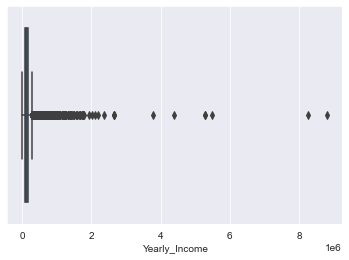

In [113]:
# For yearly income Train data
print(df_num['Yearly_Income'].describe())
sns.boxplot(df_num['Yearly_Income'])

<AxesSubplot:xlabel='Yearly_Income', ylabel='Density'>

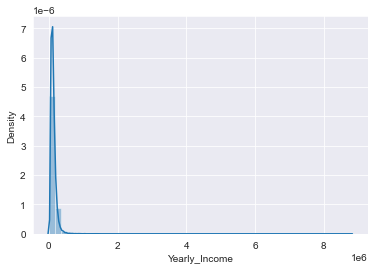

In [114]:
sns.distplot(df_num['Yearly_Income'])

count    1.180790e+05
mean     2.947373e+04
std      3.691159e+04
min      0.000000e+00
25%      1.143819e+04
50%      2.081754e+04
75%      3.638025e+04
max      1.535830e+06
Name: Unpaid_Amount, dtype: float64


<AxesSubplot:xlabel='Unpaid_Amount'>

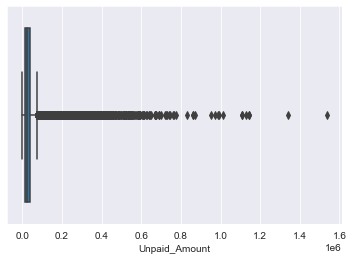

In [115]:
# For Unpaid Amount
print(df_num['Unpaid_Amount'].describe())
sns.boxplot(df_num['Unpaid_Amount'])


<AxesSubplot:xlabel='Unpaid_Amount', ylabel='Density'>

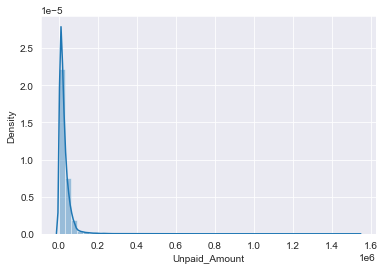

In [116]:
sns.distplot(df_num['Unpaid_Amount'])

count    1.190000e+05
mean     5.332249e+04
std      5.292769e+04
min      3.320000e+02
25%      2.324000e+04
50%      3.967400e+04
75%      6.640000e+04
max      1.710630e+06
Name: Total_Unpaid_CL, dtype: float64


<AxesSubplot:xlabel='Total_Unpaid_CL'>

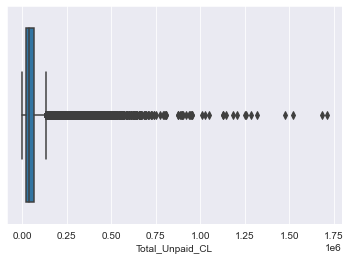

In [117]:
# For Total Unpaid CL
print(df_num['Total_Unpaid_CL'].describe())
sns.boxplot(df_num['Total_Unpaid_CL'])

<AxesSubplot:xlabel='Total_Unpaid_CL', ylabel='Density'>

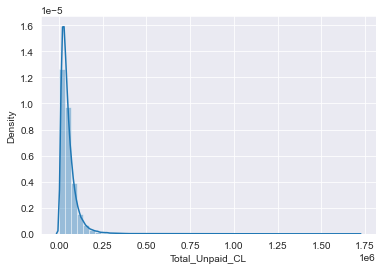

In [118]:
sns.distplot(df_num.Total_Unpaid_CL)

count    120000.000000
mean         30.935573
std          14.017660
min           0.000000
25%          20.445600
50%          30.156000
75%          40.840800
max         639.290400
Name: Debt_to_Income_Ratio, dtype: float64


<AxesSubplot:xlabel='Debt_to_Income_Ratio'>

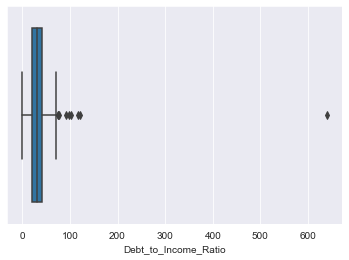

In [119]:
# For Debt to Income ratio
print(df_num.Debt_to_Income_Ratio.describe())
sns.boxplot(df_num.Debt_to_Income_Ratio)

<AxesSubplot:xlabel='Debt_to_Income_Ratio', ylabel='Density'>

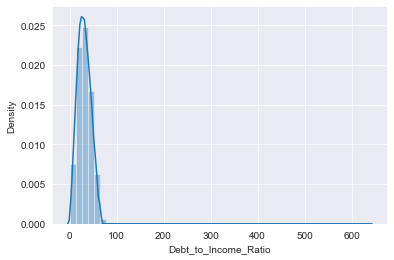

In [120]:
sns.distplot(df_num.Debt_to_Income_Ratio)

In [121]:
# Missing value Imputation for Yearly Income ,Unpaid Amount,Total Unpaid CL,Debt to Income  with median 
# for first model building the Designation and Postal code feture has more than 5000 unique sub catagory we can drop it

df_num['Yearly_Income'].replace(np.nan,value=df_num['Yearly_Income'].median(),inplace=True)
df_num['Unpaid_Amount'].replace(np.nan,value=df_num['Unpaid_Amount'].median(),inplace=True)
df_num['Total_Unpaid_CL'].replace(np.nan,value=df_num['Total_Unpaid_CL'].median(),inplace=True)
df_num['Debt_to_Income_Ratio'].replace(np.nan,value=df_num['Debt_to_Income_Ratio'].median(),inplace=True)


In [122]:
# EDA purpose we can drop ID but can save all id in the ID object name
ID = df_num['ID']

df_num= df_num.drop(['ID'],axis=1)

In [123]:
df_num.isnull().sum()

Asst_Reg                0
Yearly_Income           0
Debt_to_Income_Ratio    0
Lend_Amount             0
Interest_Charged        0
Usage_Rate              0
Present_Balance         0
Gross_Collection        0
Total_Unpaid_CL         0
Unpaid_Amount           0
Due_Fee                 0
dtype: int64

In [124]:
df_cat.isnull().sum()

GGGrade                    0
Experience                 0
Validation                 0
Home_Status                0
Unpaid_2_years             0
Already_Defaulted          0
Designation             2000
Deprecatory_Records        0
Inquiries                  0
Sub_GGGrade                0
File_Status                0
State                      0
Account_Open               0
Duration                   0
Reason                     0
Default                37500
dtype: int64

In [125]:
# drop Designation variable from catagorical data (Need feature engineering)
df_cat= df_cat.drop(['Designation'],axis=1)

## 2 Exploratory Data Analyis

In this section you can talk about the plots and the insights you have generated from the data

























### Univariate Analysis 

In [126]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Asst_Reg,125000.0,3.800697e+06,2.287555e+06,24847.0,1.487898e+06,4132377.000,5.945917e+06,7.351969e+06
Yearly_Income,125000.0,1.333177e+05,9.610471e+04,8800.0,8.624000e+04,114400.000,1.584000e+05,8.800000e+06
Debt_to_Income_Ratio,125000.0,3.090439e+01,1.373529e+01,0.0,2.086560e+01,30.156,4.033680e+01,6.392904e+02
Lend_Amount,125000.0,2.589278e+04,1.442432e+04,1710.0,1.500525e+04,23940.000,3.420000e+04,5.985000e+04
Interest_Charged,125000.0,1.651617e+01,4.905170e+00,8.0,1.229000e+01,16.500,2.077000e+01,2.500000e+01
Usage_Rate,125000.0,9.543988e+01,4.053581e+01,0.0,6.587600e+01,96.836,1.265920e+02,1.534756e+03
Present_Balance,125000.0,2.360785e+05,2.548323e+05,0.0,5.158463e+04,138696.840,3.528714e+05,5.629234e+06
Gross_Collection,125000.0,3.946841e+01,3.837882e+02,0.0,0.000000e+00,0.000,0.000000e+00,2.630847e+04
Total_Unpaid_CL,125000.0,5.266736e+04,5.172414e+04,332.0,2.407000e+04,39674.000,6.440800e+04,1.710630e+06
Unpaid_Amount,125000.0,2.899445e+04,3.592975e+04,0.0,1.194093e+04,20817.540,3.503961e+04,1.535830e+06


In [127]:
def univariate_analysis1(column,nbins):
    print("Distribution of " + column)
    print('------------------------------------------------')
    #plt.subplots(1,2,1)
    sns.set_style("darkgrid")
    sns.histplot(df_num[column], kde=True,palette='colorblind');
    plt.show()
    
    #plt.subplots(1,2,2)
    print("BoxPlot of " + column)
    print('------------------------------------------------')
    ax = sns.boxplot(x=df_num[column],color='y')
    plt.show()

In [128]:
numeric_columns = list(df_num.columns.values)

Distribution of Asst_Reg
------------------------------------------------


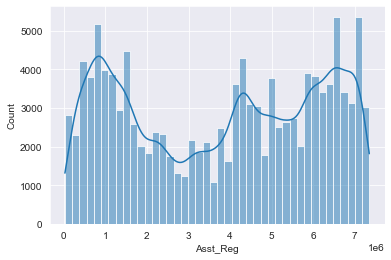

BoxPlot of Asst_Reg
------------------------------------------------


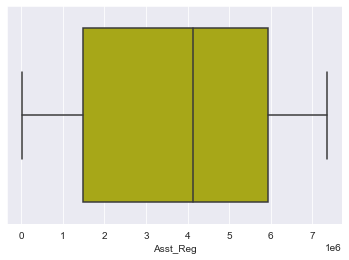

Distribution of Yearly_Income
------------------------------------------------


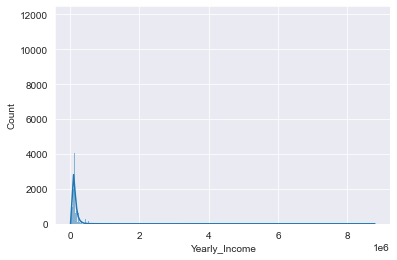

BoxPlot of Yearly_Income
------------------------------------------------


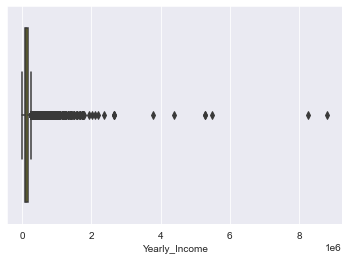

Distribution of Debt_to_Income_Ratio
------------------------------------------------


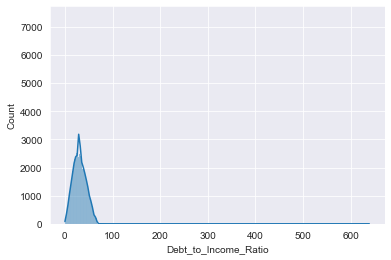

BoxPlot of Debt_to_Income_Ratio
------------------------------------------------


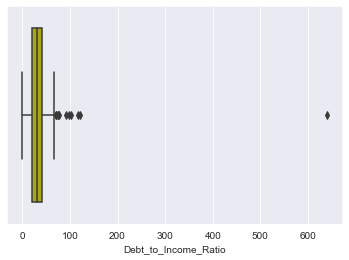

Distribution of Lend_Amount
------------------------------------------------


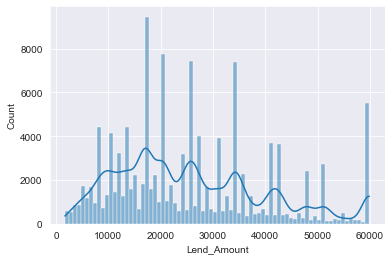

BoxPlot of Lend_Amount
------------------------------------------------


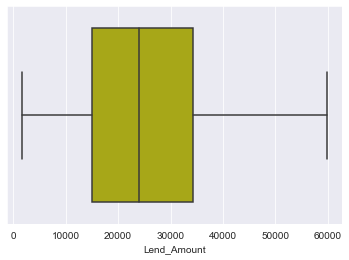

Distribution of Interest_Charged
------------------------------------------------


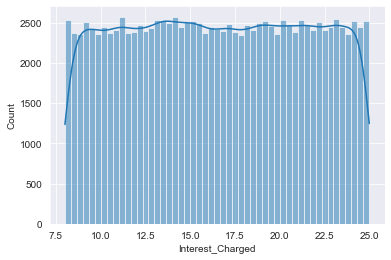

BoxPlot of Interest_Charged
------------------------------------------------


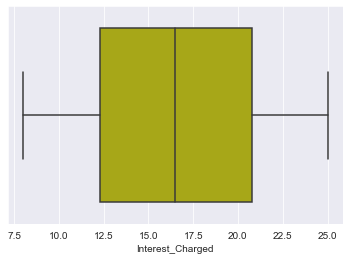

Distribution of Usage_Rate
------------------------------------------------


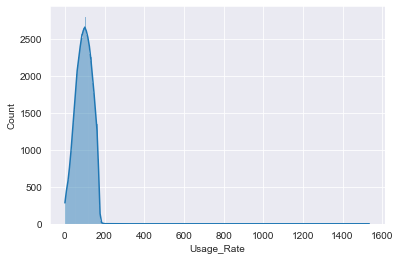

BoxPlot of Usage_Rate
------------------------------------------------


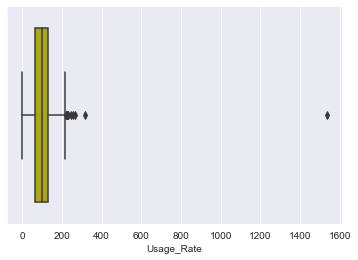

Distribution of Present_Balance
------------------------------------------------


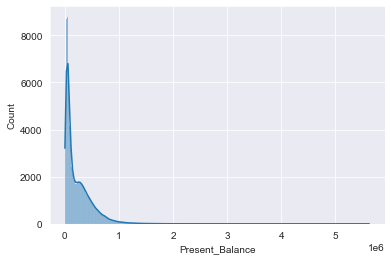

BoxPlot of Present_Balance
------------------------------------------------


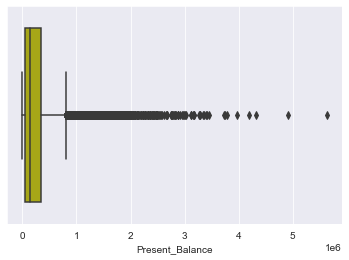

Distribution of Gross_Collection
------------------------------------------------


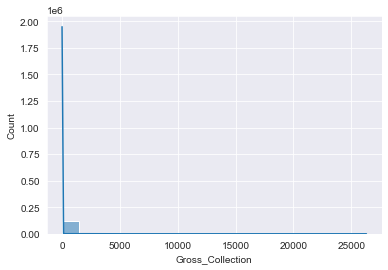

BoxPlot of Gross_Collection
------------------------------------------------


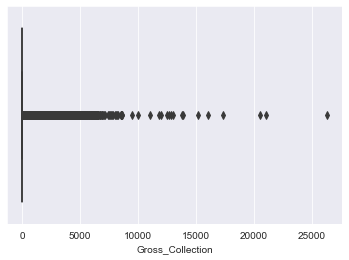

Distribution of Total_Unpaid_CL
------------------------------------------------


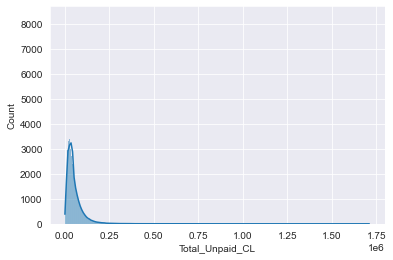

BoxPlot of Total_Unpaid_CL
------------------------------------------------


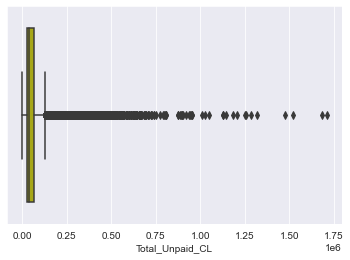

Distribution of Unpaid_Amount
------------------------------------------------


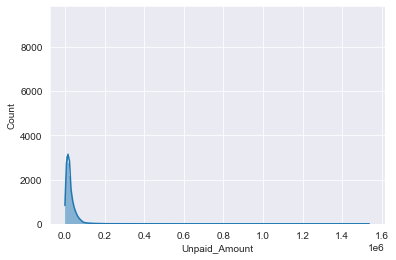

BoxPlot of Unpaid_Amount
------------------------------------------------


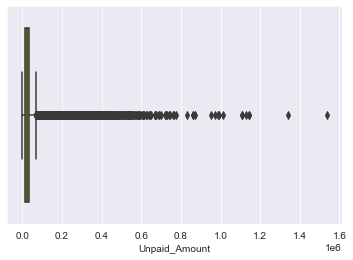

Distribution of Due_Fee
------------------------------------------------


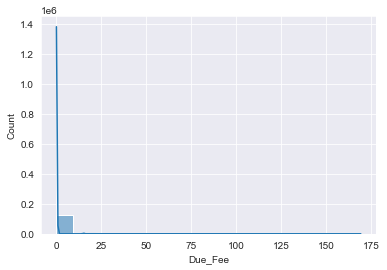

BoxPlot of Due_Fee
------------------------------------------------


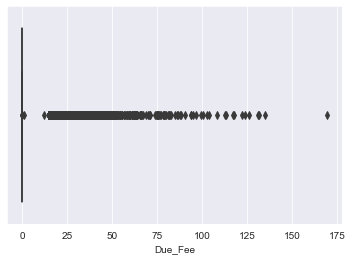

In [129]:
for x in numeric_columns:
    univariate_analysis1(x,10)

* Almost all feature are right skewed we need to treat the if we want to build the model who has assumption about dristribution of data.
* There are also outlier present in the dataset.
* From the skeweness value there are highly skewed variable . we can deal with it by using the log transform of a variable.

In [130]:
#  Checking count values for catagorical columns in Trian
for column in df_cat.columns:
    print(column)
    print(df_cat[column].nunique())
    print(df_cat[column].value_counts().sort_values(ascending=False))
    
    print('\n')

GGGrade
7
II     35505
III    35334
I      20300
IV     19725
V      10252
VI      3155
VII      729
Name: GGGrade, dtype: int64


Experience
11
>10yrs    44008
2yrs      11476
3yrs      10478
<1yr      10311
1yrs       8296
5yrs       8035
4yrs       7563
8yrs       6748
7yrs       6731
6yrs       6112
9yrs       5242
Name: Experience, dtype: int64


Validation
3
Source_Verified    49150
Vfied              38008
Not_Vfied          37842
Name: Validation, dtype: int64


Home_Status
5
MORTGAGE    63072
RENT        49906
OWN         12008
OTHER           8
NONE            6
Name: Home_Status, dtype: int64


Unpaid_2_years
19
0     99683
1     16570
2      5159
3      1816
4       839
5       399
6       238
7       110
8        66
9        34
10       30
12       19
11       15
18        5
13        5
14        5
15        3
16        2
17        2
Name: Unpaid_2_years, dtype: int64


Already_Defaulted
7
0    124348
1       617
2        28
3         4
6         1
5         1
4         1


### Bivariate Analysis With respect to target variable

In [131]:
df_cat.describe().T

,count,unique,top,freq
GGGrade,125000,7,II,35505
Experience,125000,11,>10yrs,44008
Validation,125000,3,Source_Verified,49150
Home_Status,125000,5,MORTGAGE,63072
Unpaid_2_years,125000,19,0,99683
Already_Defaulted,125000,7,0,124348
Deprecatory_Records,125000,19,0,105391
Inquiries,125000,8,0,71102
Sub_GGGrade,125000,35,19,7731
File_Status,125000,2,whole,66254


In [132]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   GGGrade              125000 non-null  object
 1   Experience           125000 non-null  object
 2   Validation           125000 non-null  object
 3   Home_Status          125000 non-null  object
 4   Unpaid_2_years       125000 non-null  object
 5   Already_Defaulted    125000 non-null  object
 6   Deprecatory_Records  125000 non-null  object
 7   Inquiries            125000 non-null  object
 8   Sub_GGGrade          125000 non-null  object
 9   File_Status          125000 non-null  object
 10  State                125000 non-null  object
 11  Account_Open         125000 non-null  object
 12  Duration             125000 non-null  object
 13  Reason               125000 non-null  object
 14  Default              87500 non-null   object
dtypes: object(15)
memory usage: 15.3+ M

In [133]:
df_cat.shape[0]

125000

In [134]:
def bivariateAnalysis_cat(column):
    plt.figure()
    plt.figure(figsize=(15,10))
    print("Count of " + column)
    print("---------------------------------------------------------------------------")
    sns.set_style("darkgrid")
    ay=sns.countplot(data=df_cat,x=df_cat[column],hue='Default')
    plt.ylabel("Count")
    
    ncount=df.shape[0]
    
    for p in ay.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    plt.show()


In [135]:
list_df_cat=list(df_cat.columns.values)

Count of GGGrade
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

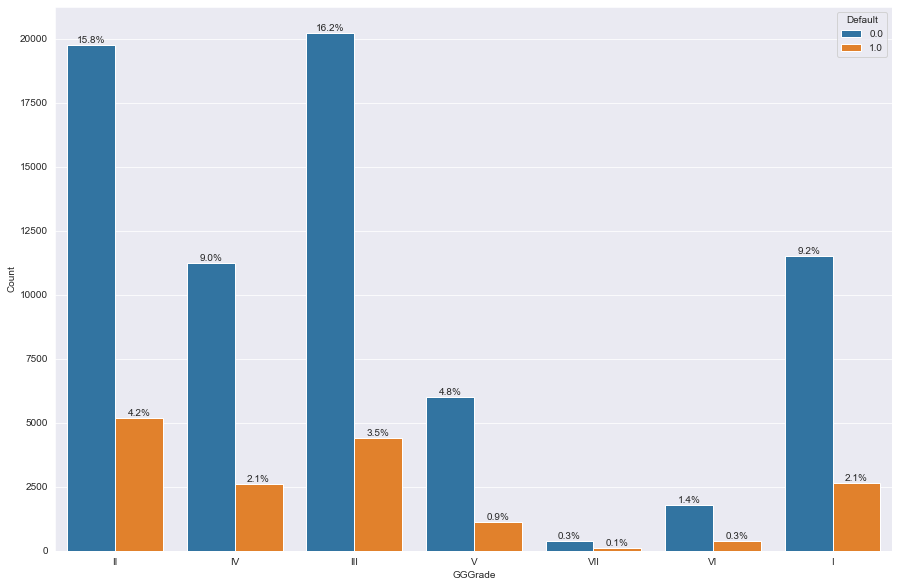

Count of Experience
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

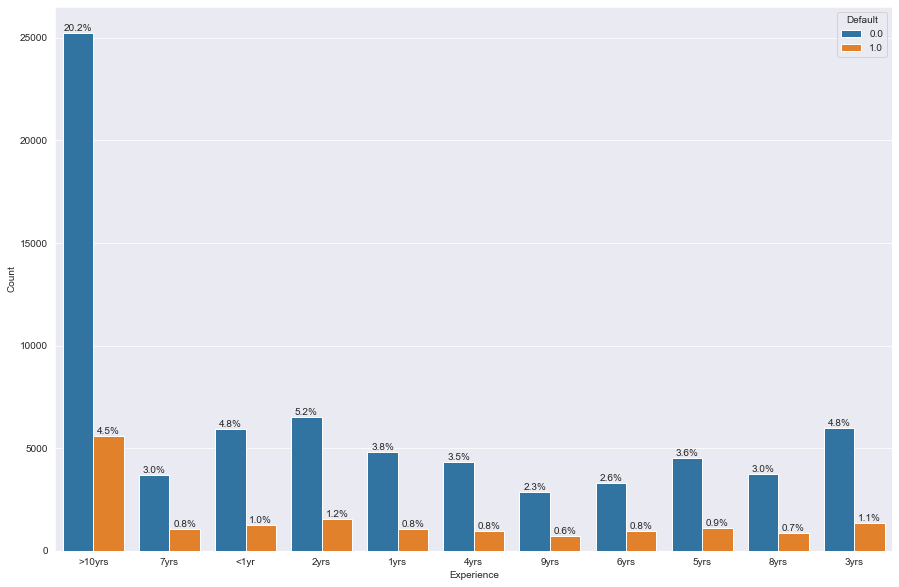

Count of Validation
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

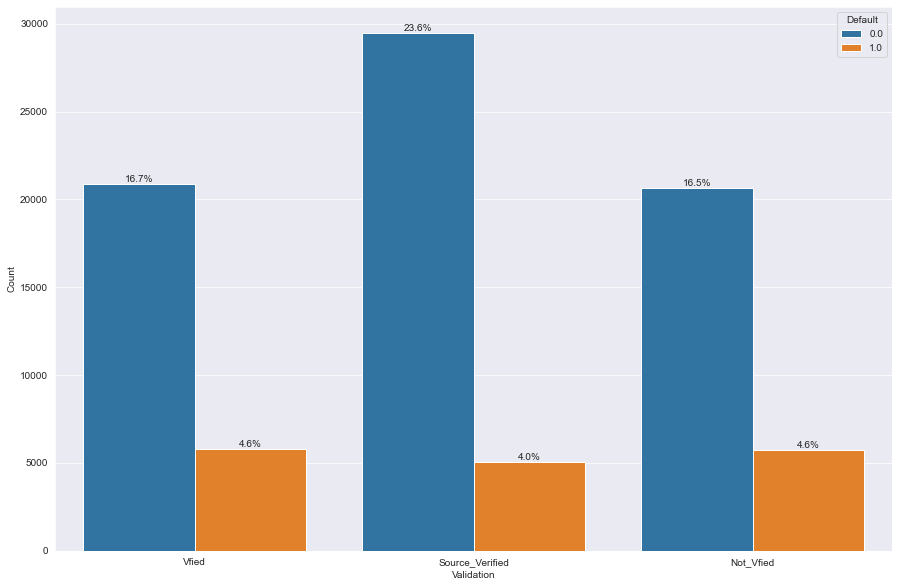

Count of Home_Status
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

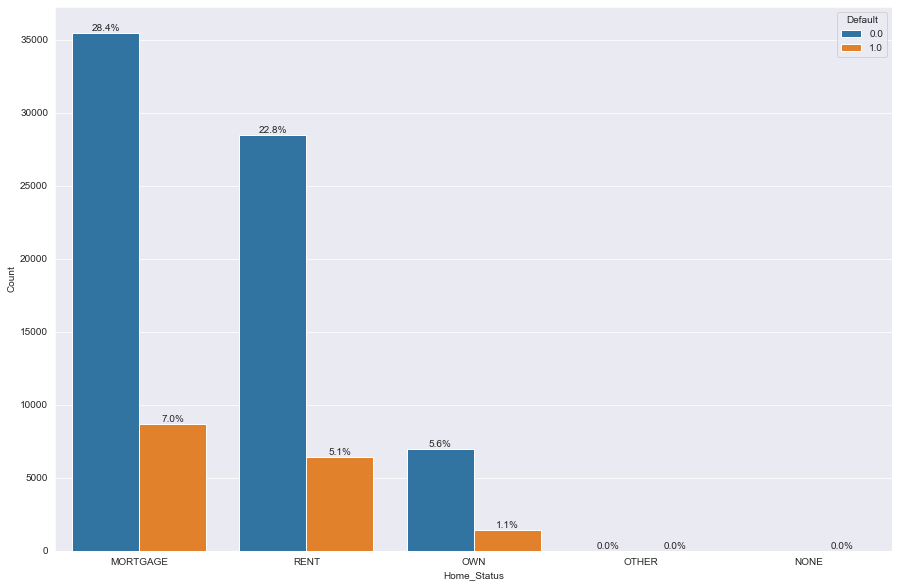

Count of Unpaid_2_years
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

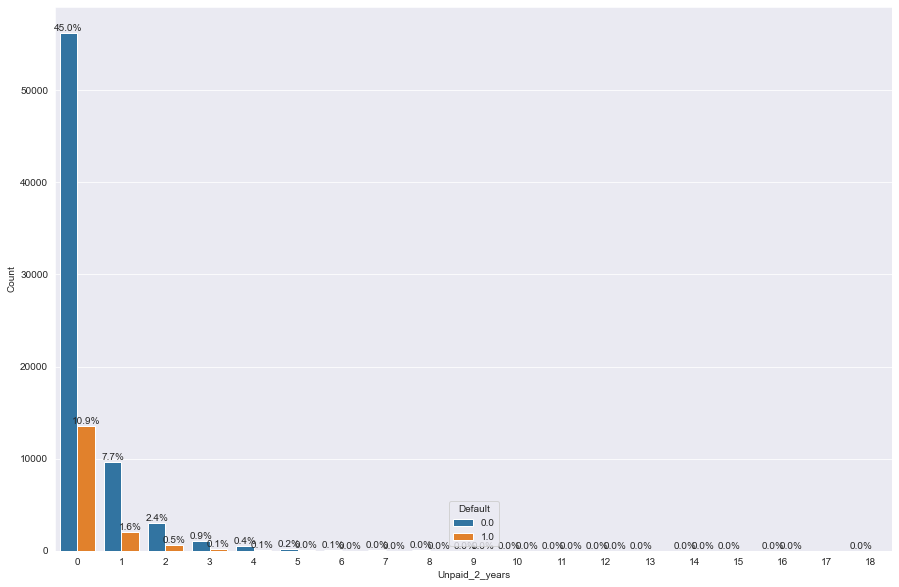

Count of Already_Defaulted
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

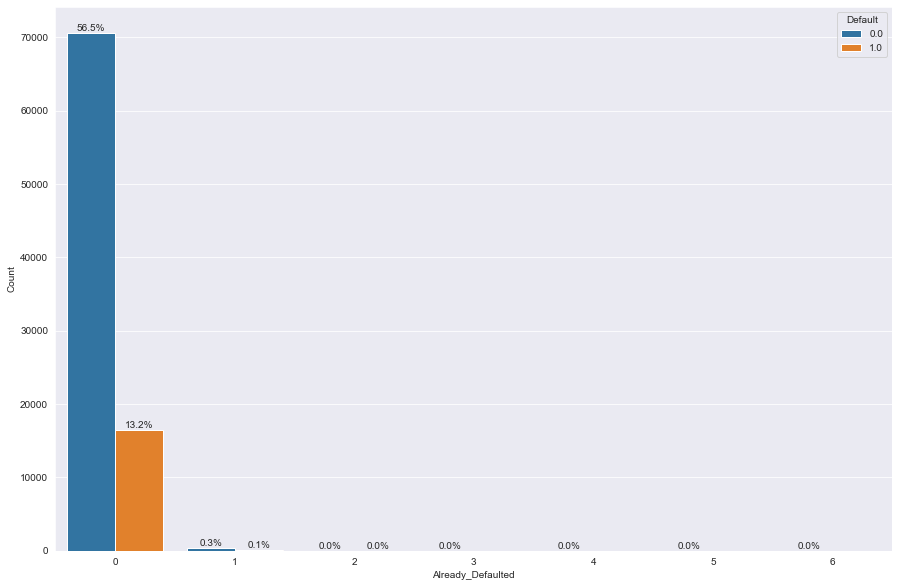

Count of Deprecatory_Records
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

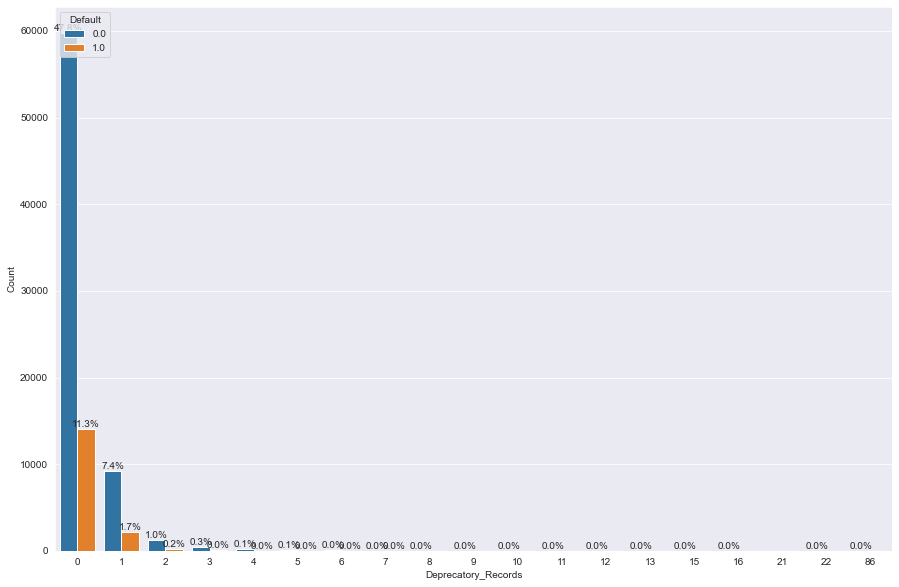

Count of Inquiries
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

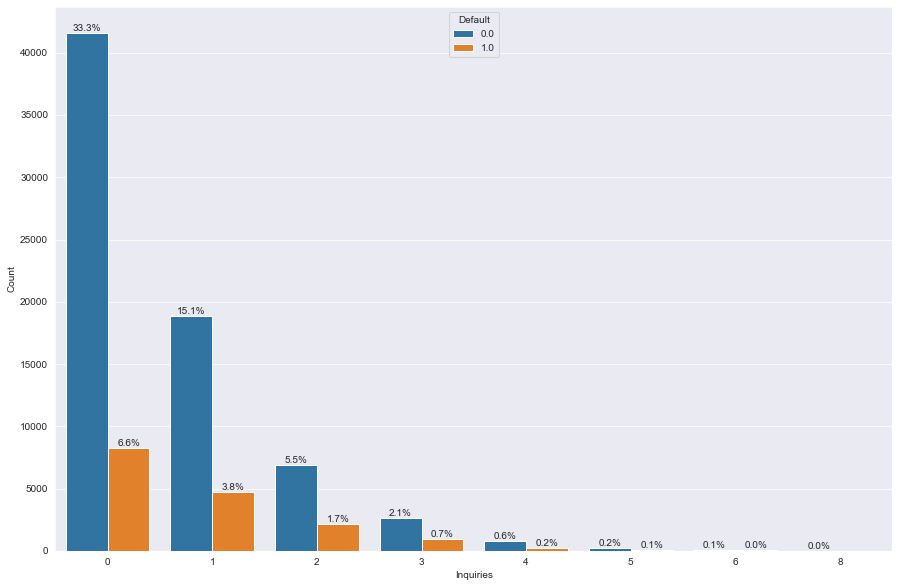

Count of Sub_GGGrade
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

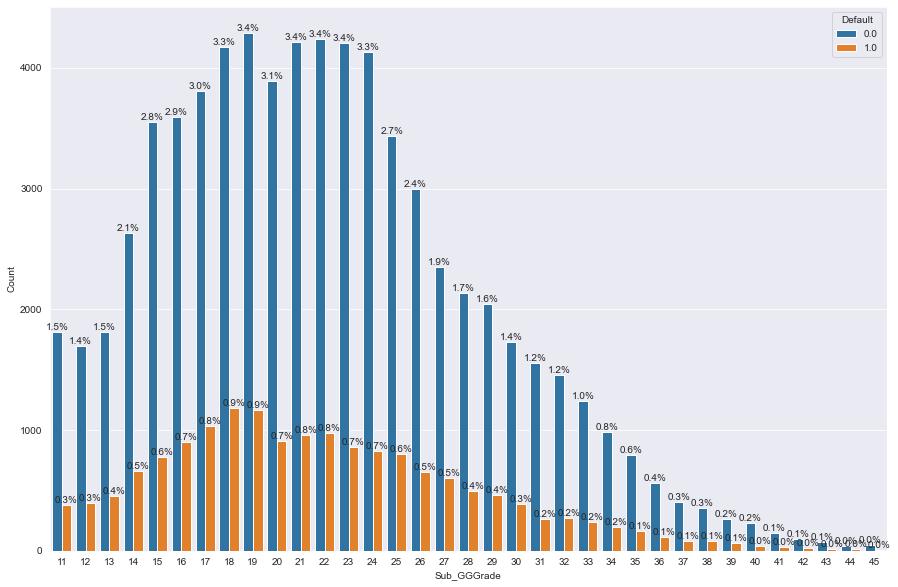

Count of File_Status
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

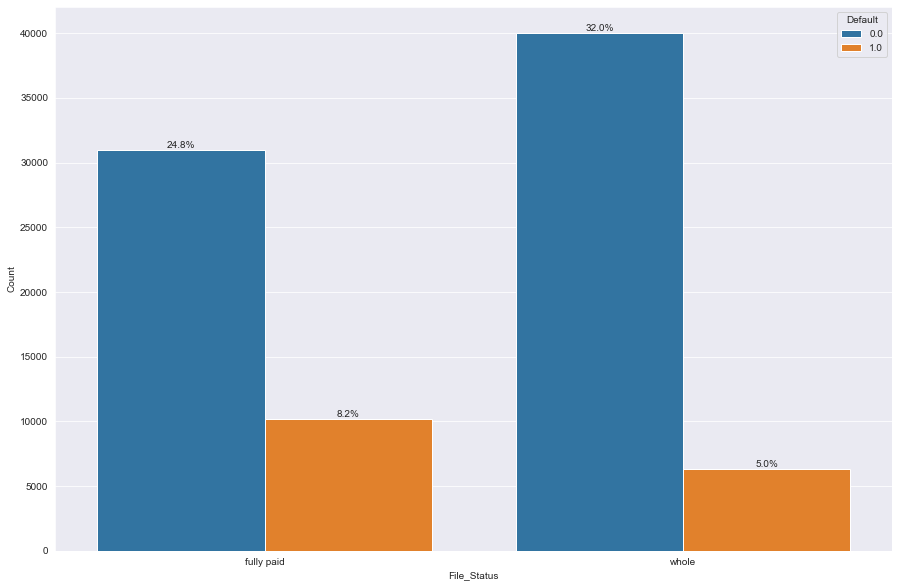

Count of State
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

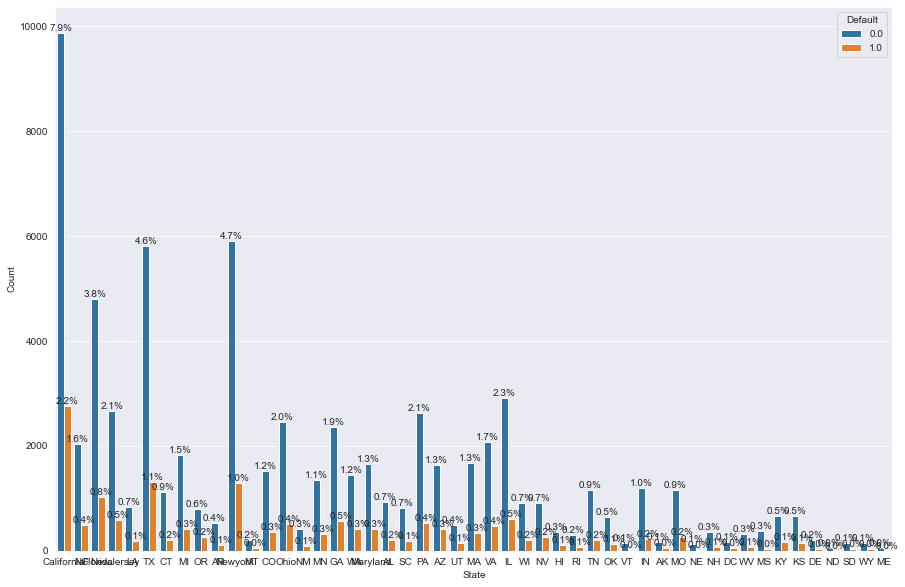

Count of Account_Open
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

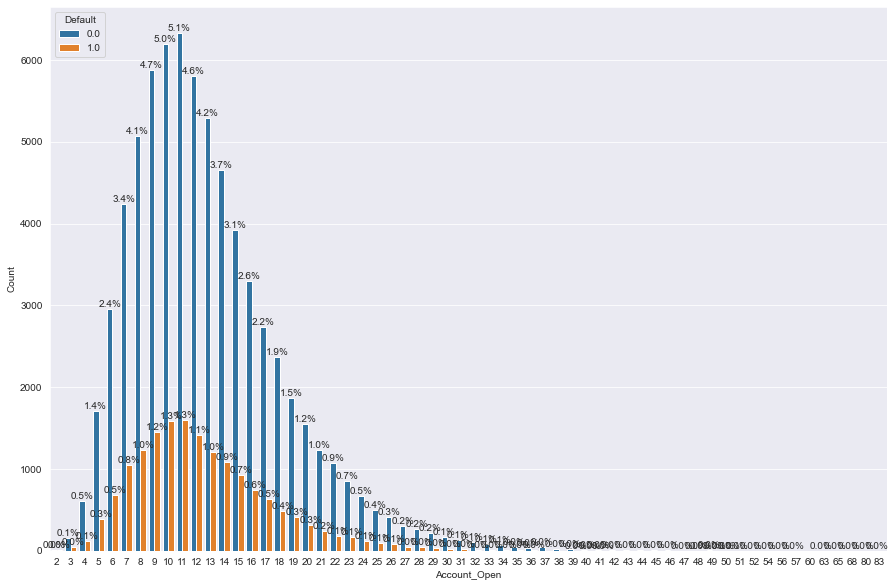

Count of Duration
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

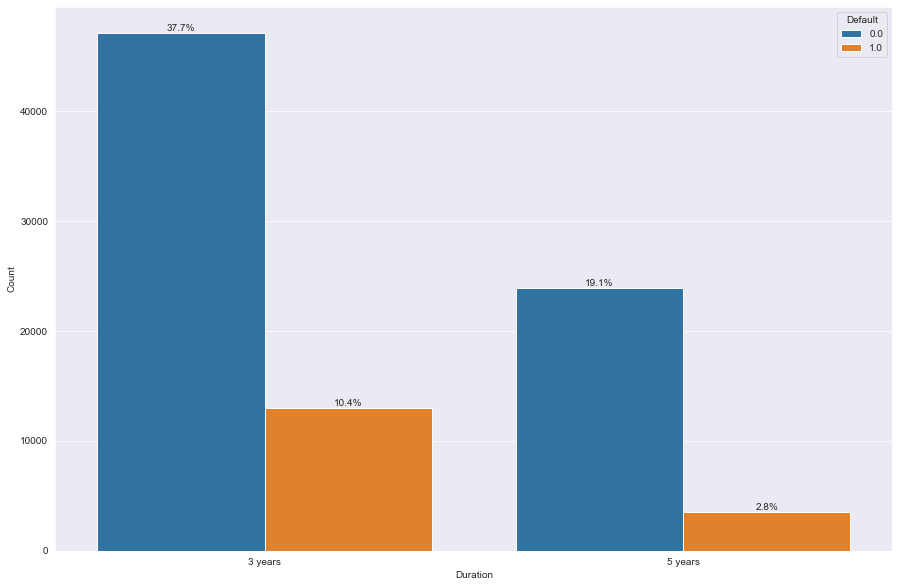

Count of Reason
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

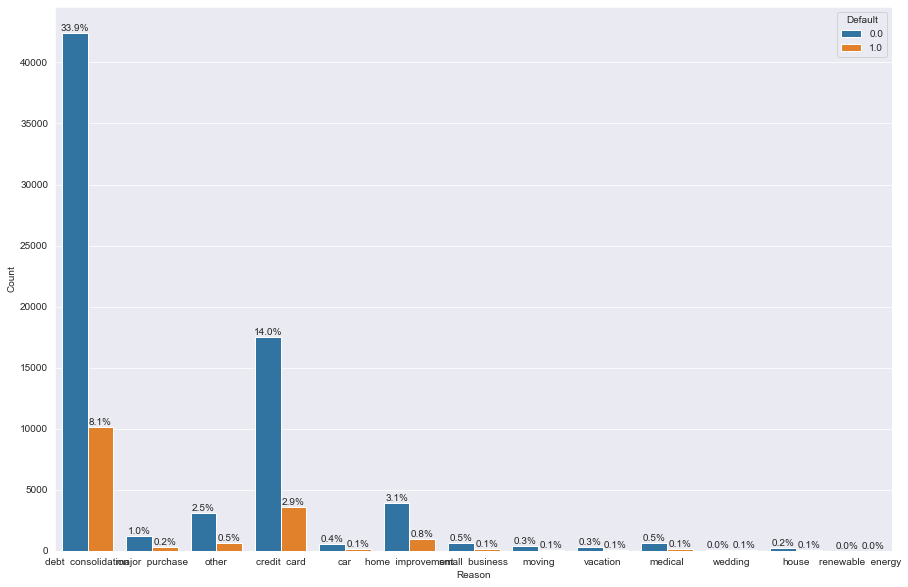

Count of Default
---------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

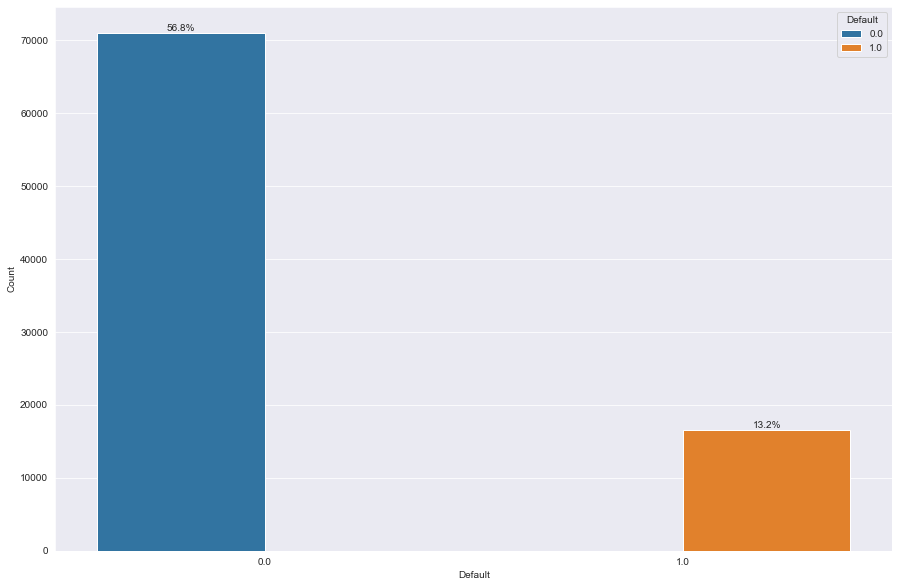

In [136]:
for x in list_df_cat:
    bivariateAnalysis_cat(x)

In [137]:
df_num.isnull().sum()

Asst_Reg                0
Yearly_Income           0
Debt_to_Income_Ratio    0
Lend_Amount             0
Interest_Charged        0
Usage_Rate              0
Present_Balance         0
Gross_Collection        0
Total_Unpaid_CL         0
Unpaid_Amount           0
Due_Fee                 0
dtype: int64

In [138]:
df_cat.isnull().sum()

GGGrade                    0
Experience                 0
Validation                 0
Home_Status                0
Unpaid_2_years             0
Already_Defaulted          0
Deprecatory_Records        0
Inquiries                  0
Sub_GGGrade                0
File_Status                0
State                      0
Account_Open               0
Duration                   0
Reason                     0
Default                37500
dtype: int64

In [139]:
# ## Analyzing Yearly_Income distribution wrt Default status

# plt.figure(figsize=(8,4))
# sns.set_style('darkgrid')
# sns.boxplot(x='Yearly_Income', y='Default', data=df)

In [140]:
# ## Analyzing Debt_to_Income_Ratio distribution wrt Default status

# plt.figure(figsize=(8,4))
# sns.set_style('darkgrid')
# sns.boxplot(x='Debt_to_Income_Ratio', y='Default', data=df_num)

In [141]:
# ## Analyzing Asst_Reg distribution wrt Default status

# plt.figure(figsize=(8,4))
# sns.set_style('darkgrid')
# sns.boxplot(x='Asst_Reg', y='Default', data=df_num)

In [142]:
# ## Analyzing Lend_Amount  distribution wrt Default status

# plt.figure(figsize=(8,4))
# sns.set_style('darkgrid')
# sns.boxplot(x='Lend_Amount ', y='Default', data=df_num)

In [143]:
# ## Check Pairplot for of variables

# sns.pairplot(df_train_num1,diag_kind='kde')

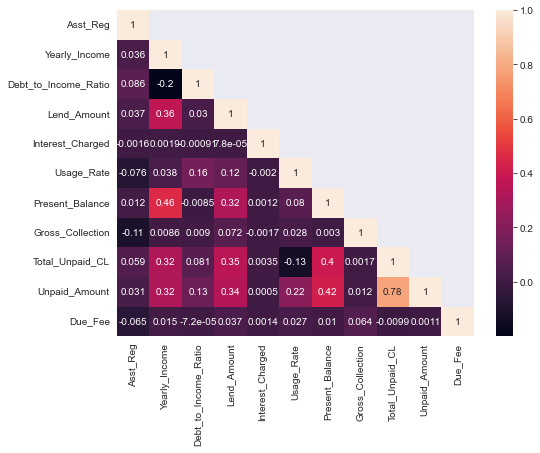

In [144]:
# heatmap for corelation values
corr1 = df_num.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr1,annot=True,mask=np.triu(corr1,+1));


* High correlation between Total_unpaid_cl and Unpaid Amount

## Insignts and Observations
* non default and default ratioin train set is 81:19
* The duration of 3 year customer chance of deafaut is more than 5 year
* debt consolidation is the major reason for default folowed by the credit card
* Customer from state of california has highest default percentage
* As Count of Inquiries increases the default percentage reduces. may be more inquiries due to emergency of customer who is responsible and well aware 
* Most likely the persone do not have other loan defaulted can be default. (This variable do not explain much variance) mostley defaulter are of first timer





In [145]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   GGGrade              125000 non-null  object
 1   Experience           125000 non-null  object
 2   Validation           125000 non-null  object
 3   Home_Status          125000 non-null  object
 4   Unpaid_2_years       125000 non-null  object
 5   Already_Defaulted    125000 non-null  object
 6   Deprecatory_Records  125000 non-null  object
 7   Inquiries            125000 non-null  object
 8   Sub_GGGrade          125000 non-null  object
 9   File_Status          125000 non-null  object
 10  State                125000 non-null  object
 11  Account_Open         125000 non-null  object
 12  Duration             125000 non-null  object
 13  Reason               125000 non-null  object
 14  Default              87500 non-null   object
dtypes: object(15)
memory usage: 19.3+ M

In [146]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Asst_Reg              125000 non-null  int64  
 1   Yearly_Income         125000 non-null  float64
 2   Debt_to_Income_Ratio  125000 non-null  float64
 3   Lend_Amount           125000 non-null  float64
 4   Interest_Charged      125000 non-null  float64
 5   Usage_Rate            125000 non-null  float64
 6   Present_Balance       125000 non-null  float64
 7   Gross_Collection      125000 non-null  float64
 8   Total_Unpaid_CL       125000 non-null  float64
 9   Unpaid_Amount         125000 non-null  float64
 10  Due_Fee               125000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 15.5 MB


In [147]:
### Before Dropping the value we can stored it in an object

Default= df_cat['Default']

In [148]:
df_num.columns

Index(['Asst_Reg', 'Yearly_Income', 'Debt_to_Income_Ratio', 'Lend_Amount',
       'Interest_Charged', 'Usage_Rate', 'Present_Balance', 'Gross_Collection',
       'Total_Unpaid_CL', 'Unpaid_Amount', 'Due_Fee'],
      dtype='object')

In [149]:
df_cat.columns

Index(['GGGrade', 'Experience', 'Validation', 'Home_Status', 'Unpaid_2_years',
       'Already_Defaulted', 'Deprecatory_Records', 'Inquiries', 'Sub_GGGrade',
       'File_Status', 'State', 'Account_Open', 'Duration', 'Reason',
       'Default'],
      dtype='object')

As the continuous variable have wide range of values so we can scale the variable to boost computation and scaling is neccesary for few distance bas algorithm  

## 3 Feature Engineering

In this section you can implement the feature engineering techniques for dimensionality reduction

In [150]:
for column in df_cat.columns:
    print(column)
    print(df_cat[column].nunique())
    print(df_cat[column].value_counts().sort_values(ascending=False))
    
    print('\n')

GGGrade
7
II     35505
III    35334
I      20300
IV     19725
V      10252
VI      3155
VII      729
Name: GGGrade, dtype: int64


Experience
11
>10yrs    44008
2yrs      11476
3yrs      10478
<1yr      10311
1yrs       8296
5yrs       8035
4yrs       7563
8yrs       6748
7yrs       6731
6yrs       6112
9yrs       5242
Name: Experience, dtype: int64


Validation
3
Source_Verified    49150
Vfied              38008
Not_Vfied          37842
Name: Validation, dtype: int64


Home_Status
5
MORTGAGE    63072
RENT        49906
OWN         12008
OTHER           8
NONE            6
Name: Home_Status, dtype: int64


Unpaid_2_years
19
0     99683
1     16570
2      5159
3      1816
4       839
5       399
6       238
7       110
8        66
9        34
10       30
12       19
11       15
18        5
13        5
14        5
15        3
16        2
17        2
Name: Unpaid_2_years, dtype: int64


Already_Defaulted
7
0    124348
1       617
2        28
3         4
6         1
5         1
4         1


In [151]:
# merging the subcatagory as few number of record in some subcatagory
df_cat.Inquiries.replace(to_replace=[4,5,6,8],value=3,inplace=True)
df_cat.Already_Defaulted.replace(to_replace=[2,3,4,5,6],value=1,inplace=True)
df_cat.Home_Status.replace(to_replace=['OTHER','NONE'],value='MORTGAGE',inplace=True)
df_cat.GGGrade.replace(to_replace=['VI','VII'],value='V',inplace=True)
df_cat.Unpaid_2_years.replace(to_replace=[11, 7, 9, 12, 8, 10, 18, 16, 15, 13, 14, 17],value=6,inplace=True)
df_cat.Deprecatory_Records.replace(to_replace=[5, 4, 7, 6, 9, 8, 10, 12, 86, 11, 13, 16, 22, 15, 21],value=3,inplace=True)
# Validation

In [152]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   GGGrade              125000 non-null  object
 1   Experience           125000 non-null  object
 2   Validation           125000 non-null  object
 3   Home_Status          125000 non-null  object
 4   Unpaid_2_years       125000 non-null  int64 
 5   Already_Defaulted    125000 non-null  int64 
 6   Deprecatory_Records  125000 non-null  int64 
 7   Inquiries            125000 non-null  int64 
 8   Sub_GGGrade          125000 non-null  object
 9   File_Status          125000 non-null  object
 10  State                125000 non-null  object
 11  Account_Open         125000 non-null  object
 12  Duration             125000 non-null  object
 13  Reason               125000 non-null  object
 14  Default              87500 non-null   object
dtypes: int64(4), object(11)
memory usag

In [153]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Asst_Reg              125000 non-null  int64  
 1   Yearly_Income         125000 non-null  float64
 2   Debt_to_Income_Ratio  125000 non-null  float64
 3   Lend_Amount           125000 non-null  float64
 4   Interest_Charged      125000 non-null  float64
 5   Usage_Rate            125000 non-null  float64
 6   Present_Balance       125000 non-null  float64
 7   Gross_Collection      125000 non-null  float64
 8   Total_Unpaid_CL       125000 non-null  float64
 9   Unpaid_Amount         125000 non-null  float64
 10  Due_Fee               125000 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 15.5 MB


* If there is delay in payment then only payment due need to pay charges 
* from the Due fee we can derive new feature ontime payment or not

In [154]:
# ## Imputing the records having due amount with Yes
# df_cat['Due_Fee'] = np.where((df['Due_Fee'] != 0) , 1 , df_cat['Due_Fee'])

In [155]:
# df_cat.Due_Fee.unique()

In [156]:
# df_cat.rename(columns={'Due_Fee': 'Ontime_payment'}, inplace=True)

In [157]:
# ## Outlier treatment 
# def remove_outlier(col):
#     sorted(col)
#     Q1,Q3=np.percentile(col,[25,75])
#     IQR=Q3-Q1
#     lower_range= Q1-(1.5 * IQR)
#     upper_range= Q3+(1.5 * IQR)
#     return lower_range, upper_range

In [158]:
# # For Train data
# for column in df_train_num1.columns:
#     lr,ur=remove_outlier(df_train_num1[column])
#     df_train_num1[column]=np.where(df_train_num1[column]>ur,ur,df_train_num1[column])
#     df_train_num1[column]=np.where(df_train_num1[column]<lr,lr,df_train_num1[column])

In [159]:
# # For Test data
# for column in df_test_num1.columns:
#     lr,ur=remove_outlier(df_test_num1[column])
#     df_test_num1[column]=np.where(df_test_num1[column]>ur,ur,df_test_num1[column])
#     df_test_num1[column]=np.where(df_test_num1[column]<lr,lr,df_test_num1[column])

In [160]:
# df_test_num1.boxplot()

In [161]:
# df_train_num1.boxplot()

### Scaling of numerical variable

In [162]:
df_num.columns

Index(['Asst_Reg', 'Yearly_Income', 'Debt_to_Income_Ratio', 'Lend_Amount',
       'Interest_Charged', 'Usage_Rate', 'Present_Balance', 'Gross_Collection',
       'Total_Unpaid_CL', 'Unpaid_Amount', 'Due_Fee'],
      dtype='object')

In [163]:
# import pandas as pd
# from sklearn import preprocessing

# # For Train
# min_max_scaler = preprocessing.MinMaxScaler()
# df_train_num1_scaled = min_max_scaler.fit_transform(df_train_num1)
# df_train_num1_scaled = pd.DataFrame(df_train_num1_scaled,columns=df_train_num1.columns,index=df_train_num1.index)

In [164]:
# # For Test
# min_max_scaler = preprocessing.MinMaxScaler()
# df_test_num1_scaled = min_max_scaler.fit_transform(df_test_num1)
# df_test_num1_scaled = pd.DataFrame(df_test_num1_scaled,columns=df_test_num1.columns,index=df_test_num1.index)

In [165]:
from scipy.stats import zscore

In [166]:
df_num_scaled=df_num.apply(zscore)

<AxesSubplot:>

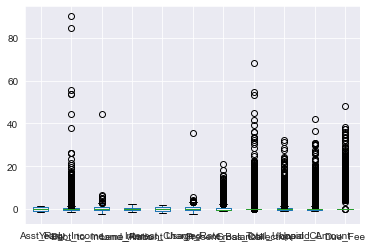

In [167]:
df_num_scaled.boxplot()

In [168]:
df_num_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Asst_Reg,125000.0,6.144862e-18,1.000004,-1.650612,-1.011040,0.144994,0.937782,1.552438
Yearly_Income,125000.0,-2.937384e-17,1.000004,-1.295651,-0.489860,-0.196845,0.260991,90.179941
Debt_to_Income_Ratio,125000.0,-2.846656e-17,1.000004,-2.250008,-0.730878,-0.054487,0.686731,44.293808
Lend_Amount,125000.0,2.783873e-16,1.000004,-1.676535,-0.754807,-0.135381,0.575920,2.354175
Interest_Charged,125000.0,3.808402e-16,1.000004,-1.736168,-0.861577,-0.003296,0.867218,1.729577
Usage_Rate,125000.0,5.103118e-17,1.000004,-2.354468,-0.729330,0.034442,0.768512,35.507416
Present_Balance,125000.0,1.373763e-16,1.000004,-0.926411,-0.723984,-0.382142,0.458315,21.163632
Gross_Collection,125000.0,2.022509e-15,1.000004,-0.102839,-0.102839,-0.102839,-0.102839,68.446884
Total_Unpaid_CL,125000.0,1.289888e-16,1.000004,-1.011821,-0.552884,-0.251206,0.226987,32.054069
Unpaid_Amount,125000.0,1.882592e-16,1.000004,-0.806979,-0.474637,-0.227581,0.168250,41.938544


In [169]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   GGGrade              125000 non-null  object
 1   Experience           125000 non-null  object
 2   Validation           125000 non-null  object
 3   Home_Status          125000 non-null  object
 4   Unpaid_2_years       125000 non-null  int64 
 5   Already_Defaulted    125000 non-null  int64 
 6   Deprecatory_Records  125000 non-null  int64 
 7   Inquiries            125000 non-null  int64 
 8   Sub_GGGrade          125000 non-null  object
 9   File_Status          125000 non-null  object
 10  State                125000 non-null  object
 11  Account_Open         125000 non-null  object
 12  Duration             125000 non-null  object
 13  Reason               125000 non-null  object
 14  Default              87500 non-null   object
dtypes: int64(4), object(11)
memory usag

Convet variable into object datatype

In [170]:
# For train data
df_cat['Deprecatory_Records']= df_cat['Deprecatory_Records'].astype('object')
df_cat['Inquiries']= df_cat['Inquiries'].astype('object')
df_cat['Already_Defaulted']= df_cat['Already_Defaulted'].astype('object')
df_cat['Unpaid_2_years']= df_cat['Unpaid_2_years'].astype('object')


In [171]:
df_cat_codes=df_cat.copy()
df_cat_codes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   GGGrade              125000 non-null  object
 1   Experience           125000 non-null  object
 2   Validation           125000 non-null  object
 3   Home_Status          125000 non-null  object
 4   Unpaid_2_years       125000 non-null  object
 5   Already_Defaulted    125000 non-null  object
 6   Deprecatory_Records  125000 non-null  object
 7   Inquiries            125000 non-null  object
 8   Sub_GGGrade          125000 non-null  object
 9   File_Status          125000 non-null  object
 10  State                125000 non-null  object
 11  Account_Open         125000 non-null  object
 12  Duration             125000 non-null  object
 13  Reason               125000 non-null  object
 14  Default              87500 non-null   object
dtypes: object(15)
memory usage: 19.3+ M

In [172]:
# one hot encoding for catagorical variable Train 
#Dropping homes states for first iteration
list_cat=['GGGrade', 'Experience', 'Validation', 'Home_Status', 'File_Status','Duration', 'Reason', 'Already_Defaulted','Inquiries','Unpaid_2_years','Deprecatory_Records']

df_cat_codes=pd.get_dummies(df_cat_codes,columns=list_cat,drop_first=True)

In [173]:
df_cat_codes.head()

,Sub_GGGrade,State,Account_Open,Default,GGGrade_II,GGGrade_III,GGGrade_IV,GGGrade_V,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Experience_<1yr,Experience_>10yrs,Validation_Source_Verified,Validation_Vfied,Home_Status_OWN,Home_Status_RENT,File_Status_whole,Duration_5 years,Reason_credit card,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_other,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Already_Defaulted_1,Inquiries_1,Inquiries_2,Inquiries_3,Unpaid_2_years_1,Unpaid_2_years_2,Unpaid_2_years_3,Unpaid_2_years_4,Unpaid_2_years_5,Unpaid_2_years_6,Deprecatory_Records_1,Deprecatory_Records_2,Deprecatory_Records_3
0,19,California,17,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,30,NC,15,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,25,Florida,7,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,22,NewJersey,9,1.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,32,LA,10,0.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [174]:
# drop state variable
df_cat_codes=df_cat_codes.drop(['State'],axis=1)


In [175]:
df_cat_codes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 37499
Data columns (total 48 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Sub_GGGrade                 125000 non-null  object
 1   Account_Open                125000 non-null  object
 2   Default                     87500 non-null   object
 3   GGGrade_II                  125000 non-null  uint8 
 4   GGGrade_III                 125000 non-null  uint8 
 5   GGGrade_IV                  125000 non-null  uint8 
 6   GGGrade_V                   125000 non-null  uint8 
 7   Experience_2yrs             125000 non-null  uint8 
 8   Experience_3yrs             125000 non-null  uint8 
 9   Experience_4yrs             125000 non-null  uint8 
 10  Experience_5yrs             125000 non-null  uint8 
 11  Experience_6yrs             125000 non-null  uint8 
 12  Experience_7yrs             125000 non-null  uint8 
 13  Experience_8yrs             12

In [176]:
# # Lable Encoding for catagorical variable for Train
# for feature in df_train_cat_codes.columns: 
#         df_train_cat_codes[feature] = pd.Categorical(df_train_cat_codes[feature]).codes

In [177]:
# # Lable Encoding for catagorical variable for Test
# for feature in df_test_cat_codes.columns: 
#         df_test_cat_codes[feature] = pd.Categorical(df_test_cat_codes[feature]).codes

In [178]:
# # Lable Encoding for catagorical variable
# for feature in df_cat_codes.columns: 
#     if df_cat_codes[feature].astype == 'object':
#         df_cat_codes[feature] = pd.Categorical(df_cat_codes[feature]).codes

In [179]:
for column in df_cat_codes.columns:
    print(column)
    print(df_cat_codes[column].nunique())
    print(df_cat_codes[column].value_counts().sort_values(ascending=False))
    
    print('\n')

Sub_GGGrade
35
19    7731
18    7700
22    7456
21    7446
23    7303
24    7102
17    6820
20    6817
16    6437
15    6242
25    6027
26    5208
14    4628
27    4224
28    3740
29    3555
13    3198
11    3182
12    3050
30    2998
31    2604
32    2526
33    2042
34    1712
35    1368
36     983
37     732
38     618
39     461
40     361
41     252
42     184
43     137
45      78
44      78
Name: Sub_GGGrade, dtype: int64


Account_Open
60
11    11229
10    11091
9     10573
12    10245
13     9325
8      9053
14     8237
7      7524
15     6978
16     5719
6      5190
17     4856
18     4076
19     3247
5      2994
20     2670
21     2139
22     1734
23     1451
24     1127
4      1049
25      891
26      709
27      504
28      435
29      348
3       271
30      268
31      215
32      161
33      148
34      111
35       79
36       70
37       60
39       33
38       33
41       22
2        21
40       19
43       15
42       13
49       11
44       10
45        7
46        

In [180]:
df_cat_codes['Default'].value_counts()

0.0    70988
1.0    16512
Name: Default, dtype: int64

In [181]:
df_cat_codes.shape

(125000, 48)

In [182]:
# df_cat_codes['Default']= df_cat_codes['Default'].astype('int8')

In [183]:
# Saving Default columnn

df_cat_codes['Default']=Default

In [184]:
df_cat_codes.shape

(125000, 48)

In [185]:
df_cat_codes.columns

Index(['Sub_GGGrade', 'Account_Open', 'Default', 'GGGrade_II', 'GGGrade_III',
       'GGGrade_IV', 'GGGrade_V', 'Experience_2yrs', 'Experience_3yrs',
       'Experience_4yrs', 'Experience_5yrs', 'Experience_6yrs',
       'Experience_7yrs', 'Experience_8yrs', 'Experience_9yrs',
       'Experience_<1yr', 'Experience_>10yrs', 'Validation_Source_Verified',
       'Validation_Vfied', 'Home_Status_OWN', 'Home_Status_RENT',
       'File_Status_whole', 'Duration_5 years', 'Reason_credit  card',
       'Reason_debt  consolidation', 'Reason_home  improvement',
       'Reason_house', 'Reason_major  purchase', 'Reason_medical',
       'Reason_moving', 'Reason_other', 'Reason_renewable  energy',
       'Reason_small  business', 'Reason_vacation', 'Reason_wedding',
       'Already_Defaulted_1', 'Inquiries_1', 'Inquiries_2', 'Inquiries_3',
       'Unpaid_2_years_1', 'Unpaid_2_years_2', 'Unpaid_2_years_3',
       'Unpaid_2_years_4', 'Unpaid_2_years_5', 'Unpaid_2_years_6',
       'Deprecatory_Records_1

In [186]:
# Saving ID columnn

df_num_scaled['ID']=ID

In [187]:
df_num_scaled.columns

Index(['Asst_Reg', 'Yearly_Income', 'Debt_to_Income_Ratio', 'Lend_Amount',
       'Interest_Charged', 'Usage_Rate', 'Present_Balance', 'Gross_Collection',
       'Total_Unpaid_CL', 'Unpaid_Amount', 'Due_Fee', 'ID'],
      dtype='object')

In [188]:
#Merge both catagorical and Numeric scaled dataframe

df_new=pd.concat([df_cat_codes,df_num_scaled],axis=1)

In [189]:
df_new.duplicated().sum()

0

In [190]:
# Seperate the train and test data.

mask=df_new['Default']>=0

In [191]:
data_train=df_new[mask]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87500 entries, 0 to 87499
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sub_GGGrade                 87500 non-null  object 
 1   Account_Open                87500 non-null  object 
 2   Default                     87500 non-null  object 
 3   GGGrade_II                  87500 non-null  uint8  
 4   GGGrade_III                 87500 non-null  uint8  
 5   GGGrade_IV                  87500 non-null  uint8  
 6   GGGrade_V                   87500 non-null  uint8  
 7   Experience_2yrs             87500 non-null  uint8  
 8   Experience_3yrs             87500 non-null  uint8  
 9   Experience_4yrs             87500 non-null  uint8  
 10  Experience_5yrs             87500 non-null  uint8  
 11  Experience_6yrs             87500 non-null  uint8  
 12  Experience_7yrs             87500 non-null  uint8  
 13  Experience_8yrs             875

In [192]:
#Convert datatype into integer fro train

data_train['Sub_GGGrade']= data_train['Sub_GGGrade'].astype('int64')
data_train['Account_Open']= data_train['Account_Open'].astype('int64')
data_train['Default']= data_train['Default'].astype('int64')

In [193]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87500 entries, 0 to 87499
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sub_GGGrade                 87500 non-null  int64  
 1   Account_Open                87500 non-null  int64  
 2   Default                     87500 non-null  int64  
 3   GGGrade_II                  87500 non-null  uint8  
 4   GGGrade_III                 87500 non-null  uint8  
 5   GGGrade_IV                  87500 non-null  uint8  
 6   GGGrade_V                   87500 non-null  uint8  
 7   Experience_2yrs             87500 non-null  uint8  
 8   Experience_3yrs             87500 non-null  uint8  
 9   Experience_4yrs             87500 non-null  uint8  
 10  Experience_5yrs             87500 non-null  uint8  
 11  Experience_6yrs             87500 non-null  uint8  
 12  Experience_7yrs             87500 non-null  uint8  
 13  Experience_8yrs             875

In [194]:
# Test data

data_test=df_new[~mask]

In [195]:
# data_test.info()

In [196]:
#Convert datatype into integer

data_test['Sub_GGGrade']= data_test['Sub_GGGrade'].astype('int64')
data_test['Account_Open']= data_test['Account_Open'].astype('int64')

In [197]:
# data_test.info()

In [198]:
# data_train.info()

## Checking the multocoliniearity

In [199]:
import statsmodels.formula.api as SM

In [200]:
# VIF score check function
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    c_vars = input_data
    cvar_names = input_data.columns
    for i in range(len(cvar_names)):
        d = c_vars[cvar_names[i]] 
        c = c_vars[cvar_names.drop(cvar_names[i])]
        rsq = SM.ols(formula="d~c", data=c_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (cvar_names[i], " VIF = " , vif)

In [201]:
# VIF check for multicoliniearity
vif_cal(input_data=data_train.drop('Default',axis=1))

Sub_GGGrade  VIF =  15.77
Account_Open  VIF =  1.38
GGGrade_II  VIF =  3.63
GGGrade_III  VIF =  8.63
GGGrade_IV  VIF =  11.56
GGGrade_V  VIF =  17.11
Experience_2yrs  VIF =  2.16
Experience_3yrs  VIF =  2.07
Experience_4yrs  VIF =  1.8
Experience_5yrs  VIF =  1.84
Experience_6yrs  VIF =  1.65
Experience_7yrs  VIF =  1.72
Experience_8yrs  VIF =  1.7
Experience_9yrs  VIF =  1.56
Experience_<1yr  VIF =  2.05
Experience_>10yrs  VIF =  4.15
Validation_Source_Verified  VIF =  1.53
Validation_Vfied  VIF =  1.63
Home_Status_OWN  VIF =  1.15
Home_Status_RENT  VIF =  1.59
File_Status_whole  VIF =  1.15
Duration_5 years  VIF =  1.63
Reason_credit  card  VIF =  23.56
Reason_debt  consolidation  VIF =  30.19
Reason_home  improvement  VIF =  7.5
Reason_house  VIF =  1.44
Reason_major  purchase  VIF =  3.08
Reason_medical  VIF =  2.14
Reason_moving  VIF =  1.71
Reason_other  VIF =  6.08
Reason_renewable  energy  VIF =  1.05
Reason_small  business  VIF =  2.06
Reason_vacation  VIF =  1.6
Reason_weddin

In [202]:
# data_train.describe().T

In [203]:
#  Train data
data_train=data_train.drop(['GGGrade_V'],axis=1)

In [204]:
data_train=data_train.drop(['Total_Unpaid_CL'],axis=1)



In [205]:
data_train=data_train.drop(['Experience_>10yrs'],axis=1)

In [206]:
data_train=data_train.drop(['Reason_other'],axis=1)


In [207]:
data_train=data_train.drop(['Reason_credit  card'],axis=1)

In [208]:
# VIF check for multicoliniearity Above dfeature drop by one at a time and comparing VIF
vif_cal(input_data=data_train)

Sub_GGGrade  VIF =  2.09
Account_Open  VIF =  1.32
Default  VIF =  1.24
GGGrade_II  VIF =  1.61
GGGrade_III  VIF =  1.51
GGGrade_IV  VIF =  1.49
Experience_2yrs  VIF =  1.12
Experience_3yrs  VIF =  1.11
Experience_4yrs  VIF =  1.08
Experience_5yrs  VIF =  1.09
Experience_6yrs  VIF =  1.07
Experience_7yrs  VIF =  1.07
Experience_8yrs  VIF =  1.07
Experience_9yrs  VIF =  1.05
Experience_<1yr  VIF =  1.12
Validation_Source_Verified  VIF =  1.53
Validation_Vfied  VIF =  1.63
Home_Status_OWN  VIF =  1.15
Home_Status_RENT  VIF =  1.57
File_Status_whole  VIF =  1.15
Duration_5 years  VIF =  1.62
Reason_debt  consolidation  VIF =  1.26
Reason_home  improvement  VIF =  1.19
Reason_house  VIF =  1.02
Reason_major  purchase  VIF =  1.05
Reason_medical  VIF =  1.04
Reason_moving  VIF =  1.03
Reason_renewable  energy  VIF =  1.0
Reason_small  business  VIF =  1.05
Reason_vacation  VIF =  1.02
Reason_wedding  VIF =  1.01
Already_Defaulted_1  VIF =  1.03
Inquiries_1  VIF =  1.12
Inquiries_2  VIF =  1

In [209]:
#  Test data
data_test=data_test.drop(['GGGrade_V','Total_Unpaid_CL','Experience_>10yrs','Reason_other','Reason_credit  card'],axis=1)


*By taking threshould of 5 we can say  now feature which are do not have multicoliniearity 

In [210]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87500 entries, 0 to 87499
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sub_GGGrade                 87500 non-null  int64  
 1   Account_Open                87500 non-null  int64  
 2   Default                     87500 non-null  int64  
 3   GGGrade_II                  87500 non-null  uint8  
 4   GGGrade_III                 87500 non-null  uint8  
 5   GGGrade_IV                  87500 non-null  uint8  
 6   Experience_2yrs             87500 non-null  uint8  
 7   Experience_3yrs             87500 non-null  uint8  
 8   Experience_4yrs             87500 non-null  uint8  
 9   Experience_5yrs             87500 non-null  uint8  
 10  Experience_6yrs             87500 non-null  uint8  
 11  Experience_7yrs             87500 non-null  uint8  
 12  Experience_8yrs             87500 non-null  uint8  
 13  Experience_9yrs             875

In [211]:
# Train data backup
data_train_new=data_train.copy()
data_test_new=data_test.copy()

## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

In [212]:
# Split data into train and test
from sklearn.model_selection import train_test_split
from sklearn import  metrics

In [213]:
X=data_train_new.drop(['Default','ID'],axis=1)
y=data_train_new.pop('Default')

In [214]:
#  spliting datset for train and test in 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.19,stratify=y)
# test size is taken as optimize value by trieals

In [215]:
#  Size train dataset
X_train.shape

(70875, 53)

In [216]:
# size of test dataset
X_test.shape

(16625, 53)

## Model 1

## Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression

#Fit Logistic Reggression model
lr_model= LogisticRegression (n_jobs=-1,random_state=21,class_weight="balanced")
lr_model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=21)

In [218]:
# Predicting on the Training Data
lrmodel_pred_train = lr_model.predict(X_train)
# Predicting on the Test Data
lrmodel_pred_test = lr_model.predict(X_test)

In [219]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

In [220]:
print(' Train F1 score:',f1_score(y_train, lrmodel_pred_train))
print(' Test F1 score:',f1_score(y_test, lrmodel_pred_test))

 Train F1 score: 0.5228957153195418
 Test F1 score: 0.5313937319499411


In [221]:
print(classification_report(y_test,lrmodel_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.72      0.82     13488
           1       0.40      0.79      0.53      3137

    accuracy                           0.74     16625
   macro avg       0.67      0.76      0.67     16625
weighted avg       0.84      0.74      0.76     16625



In [222]:
### Logistic regression simple

In [223]:
# from sklearn.linear_model import LogisticRegression
# clf = LogisticRegression(class_weight="balanced",random_state=21)
# clf.fit(X_train, y_train)
# THRESHOLD = 0.651
# preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [224]:
# pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
#                    precision_score(y_test, preds),f1_score(y_test, preds)],
#              index=["accuracy", "recall", "precision","F1_score"])

In [225]:
# # Predicting on the Training Data
# clf_pred_train = clf.predict(X_train)
# # Predicting on the Test Data
# clf_pred_test = clf.predict(X_test)

### Naive Bayes Model

In [226]:
# from sklearn.naive_bayes import GaussianNB

# NB_model=GaussianNB()
# NB_model.fit(X_train,y_train)

In [227]:
# # Predicting on the Training Data
# NB_model_pred_train = NB_model.predict(X_train)
# # Predicting on the Test Data
# NB_model_pred_test = NB_model.predict(X_test)

In [228]:
# print(' Train F1 score:',f1_score(y_train, NB_model_pred_train))
# print(' Test F1 score:',f1_score(y_test, NB_model_pred_test))

### Decision Tree

In [229]:
# from sklearn.tree import DecisionTreeClassifier

In [230]:
# dtc= DecisionTreeClassifier()

In [231]:
# dtc.fit(X_train,y_train)

In [232]:
# # Predicting on the Training Data
# dtc_pred_train = dtc.predict(X_train)
# # Predicting on the Test Data
# dtc_pred_test = dtc.predict(X_test)

In [233]:
# print(' Train F1 score:',f1_score(y_train, dtc_pred_train))
# print(' Test F1 score:',f1_score(y_test, dtc_pred_test))

In [234]:
# print(classification_report(y_test,dtc_pred_test))

### Random forest classifier

In [235]:
# from sklearn.ensemble import RandomForestClassifier 

In [236]:
# # # Parameter choosen with gridsearch CV and random traials
# # ##rfc=RandomForestClassifier(n_estimators=2001,random_state=25,ccp_alpha=0.00)
# rfc=RandomForestClassifier(n_estimators=201,random_state=10,ccp_alpha=0.00)

In [237]:
# rfc.fit(X_train,y_train)

In [238]:
# # Predicting on the Training Data
# rfc_pred_train = rfc.predict(X_train)
# # Predicting on the Test Data
# rfc_pred_test = rfc.predict(X_test)

In [239]:
# print(' Train F1 score:',f1_score(y_train, rfc_pred_train))
# print(' Test F1 score:',f1_score(y_test, rfc_pred_test))

In [240]:
# print(classification_report(y_test,rfc_pred_test))

### Bagging Classifier

In [241]:
# from sklearn.ensemble import BaggingClassifier

# Bagging_model=BaggingClassifier()
# Bagging_model.fit(X_train, y_train)

In [242]:
# # Predicting on the Training Data
# Bagging_model_pred_train = Bagging_model.predict(X_train)
# # Predicting on the Test Data
# Bagging_model_pred_test = Bagging_model.predict(X_test)

In [243]:
# print(' Train F1 score:',f1_score(y_train, Bagging_model_pred_train))
# print(' Test F1 score:',f1_score(y_test, Bagging_model_pred_test))

In [244]:
# print(classification_report(y_test,Bagging_model_pred_test))

### Adaptive Boosting

In [245]:
# from sklearn.ensemble import AdaBoostClassifier

In [246]:
# Adbc_model=AdaBoostClassifier()

# # Fitting data 
# Adbc_model.fit(X_train, y_train)

In [247]:
# # Predicting on the Training Data
# Adbc_model_pred_train = Adbc_model.predict(X_train)
# # Predicting on the Test Data
# Adbc_model_pred_test = Adbc_model.predict(X_test)

In [248]:
# print(' Train F1 score:',f1_score(y_train, Bagging_model_pred_train))
# print(' Test F1 score:',f1_score(y_test, Bagging_model_pred_test))

In [249]:
# print(classification_report(y_test,Bagging_model_pred_test))

### Gradient Boosting

In [250]:
# from sklearn.ensemble import GradientBoostingClassifier

In [251]:
# gbc= GradientBoostingClassifier(random_state = 100)
# gbc.fit(X_train,y_train)

In [252]:
# # Predicting on the Training Data
# gbc_pred_train = gbc.predict(X_train)
# # Predicting on the Test Data
# gbc_pred_test = gbc.predict(X_test)

In [253]:
# print(' Train F1 score:',f1_score(y_train, gbc_pred_train))
# print(' Test F1 score:',f1_score(y_test, gbc_pred_test))

### LDA

In [254]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# #  Appying basic LDA model
# lda_model=LinearDiscriminantAnalysis()

In [255]:
# #  fitting data into LDA model
# lda_model.fit(X_train,y_train)

In [256]:
# # Predicting on the Training Data
# lda_model_pred_train = lda_model.predict(X_train)
# # Predicting on the Test Data
# lda_model_pred_test = lda_model.predict(X_test)

In [257]:
# print(' Train F1 score:',f1_score(y_train, lda_model_pred_train))
# print(' Test F1 score:',f1_score(y_test, lda_model_pred_test))

## Model 2 - Best Model

### Logistic Regression


In [258]:
# prediction on basis of logistic regression

In [259]:
data_test_new

,Sub_GGGrade,Account_Open,Default,GGGrade_II,GGGrade_III,GGGrade_IV,Experience_2yrs,Experience_3yrs,Experience_4yrs,Experience_5yrs,Experience_6yrs,Experience_7yrs,Experience_8yrs,Experience_9yrs,Experience_<1yr,Validation_Source_Verified,Validation_Vfied,Home_Status_OWN,Home_Status_RENT,File_Status_whole,Duration_5 years,Reason_debt consolidation,Reason_home improvement,Reason_house,Reason_major purchase,Reason_medical,Reason_moving,Reason_renewable energy,Reason_small business,Reason_vacation,Reason_wedding,Already_Defaulted_1,Inquiries_1,Inquiries_2,Inquiries_3,Unpaid_2_years_1,Unpaid_2_years_2,Unpaid_2_years_3,Unpaid_2_years_4,Unpaid_2_years_5,Unpaid_2_years_6,Deprecatory_Records_1,Deprecatory_Records_2,Deprecatory_Records_3,Asst_Reg,Yearly_Income,Debt_to_Income_Ratio,Lend_Amount,Interest_Charged,Usage_Rate,Present_Balance,Gross_Collection,Unpaid_Amount,Due_Fee,ID
0,17,23,NaN,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.886283,0.077857,-1.018314,-0.550307,-1.556765,-0.419578,-0.691866,-0.102839,-0.368457,-0.089789,198980
1,19,17,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.654665,0.132797,-0.160899,2.354175,-1.308047,-0.470496,1.165020,-0.102839,1.092222,-0.089789,167688
2,37,15,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1.578511,0.716977,1.474427,2.354175,0.567533,1.532284,0.206953,-0.102839,1.037537,-0.089789,198768
3,19,18,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,-0.992239,-0.288412,-0.283212,-0.455467,-1.568997,-1.544021,0.740042,-0.102839,-0.372931,-0.089789,192564
4,25,7,NaN,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.266495,0.187737,-1.494112,-0.037577,-0.610821,0.322978,0.061317,-0.102839,-0.560638,-0.089789,151199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,29,19,NaN,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.862986,1.817633,-0.107082,2.354175,0.536953,-1.068785,2.401704,-0.102839,0.798478,-0.089789,191405
37496,28,14,NaN,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-1.039045,0.260991,0.050702,0.160994,0.510450,1.718984,1.485814,-0.102839,0.623478,-0.089789,164868
37497,33,9,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,-0.832843,-0.837815,1.169868,-1.454253,0.441135,-1.000894,-0.740846,-0.102839,-0.729498,-0.089789,163156
37498,40,9,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,-0.713335,-0.837815,1.248148,-0.728133,-1.232616,1.044318,-0.504113,-0.102839,-0.227581,-0.089789,169610


In [260]:
# # Logistic regression model perfomance is better than all models
data_test_new_drop=data_test_new.drop(['ID','Default'],axis=1)
Loan_No_loan =lr_model.predict(data_test_new_drop)

In [261]:
Loan_No_loan

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [167]:
data_test_new['Loan/No Loan']=Loan_No_loan

In [169]:
# Create csv file for Submission with two column
data_test_new[['ID','Loan/No Loan']].to_csv(r'C:\Users\user\Desktop\Great_Learning_Content\10_Hackathon\Mu_Sigma Hackathon\Hack_Submission.csv',index=False)